Like many people starting out with machine learning, visualizing classification boundaries in high dimensions is often difficult to comprehend. I intended for this notebook to solidfy my understanding of how different classifiers place boundaries in feature space. Ofcourse since we are limited to how many dimensions we can visualize, I used different types of kernel PCA's to see their effect on different types of classifiers. 

The following dataset contains information from tumors found in cancer patients in Wisconsin. Features such as the the radius of the tumor, the texture, compactness, concavity, etc. were reported. Each tumor was then labeled as malignant or benign. The purpose of this notebook is not to find the best classification algorithim and hyperparameters. Rather it is an exercise to help understand the underlying assumptions in how classifiers split the feature space.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

data = pd.read_csv('data.csv')




data.csv



Checking for missing values... Looks like one of the columns is missing data for all the rows. We can go ahead and eliminate it.

In [2]:
data.isnull().sum()
data.drop('Unnamed: 32', axis = 1, inplace = True )

We can count how many people have malignant and benign tumors . Now lets also split the data into our features and labels, then map our labels to integers.

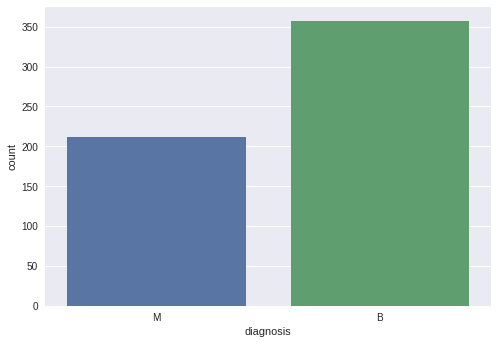

In [3]:

sns.countplot(x = 'diagnosis', data = data)


x = data.iloc[:, 3:]

y = data.diagnosis
y = y.map({'M':1,'B':0})

The features looks like they are broken into three main categories, value means, standard deivations, and 'worst'. We can check to see if there are any correlations between these subsets of features

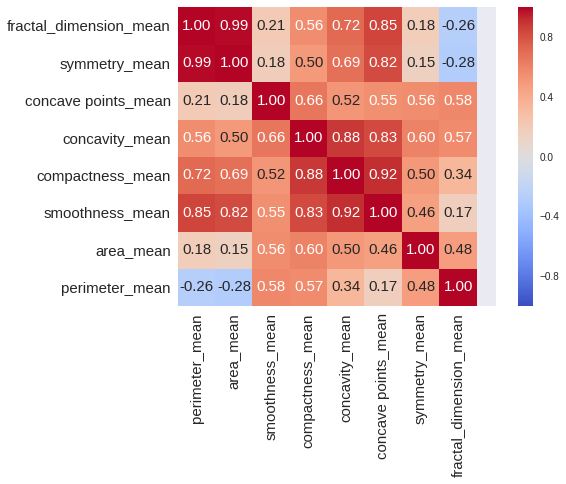

In [4]:
x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)





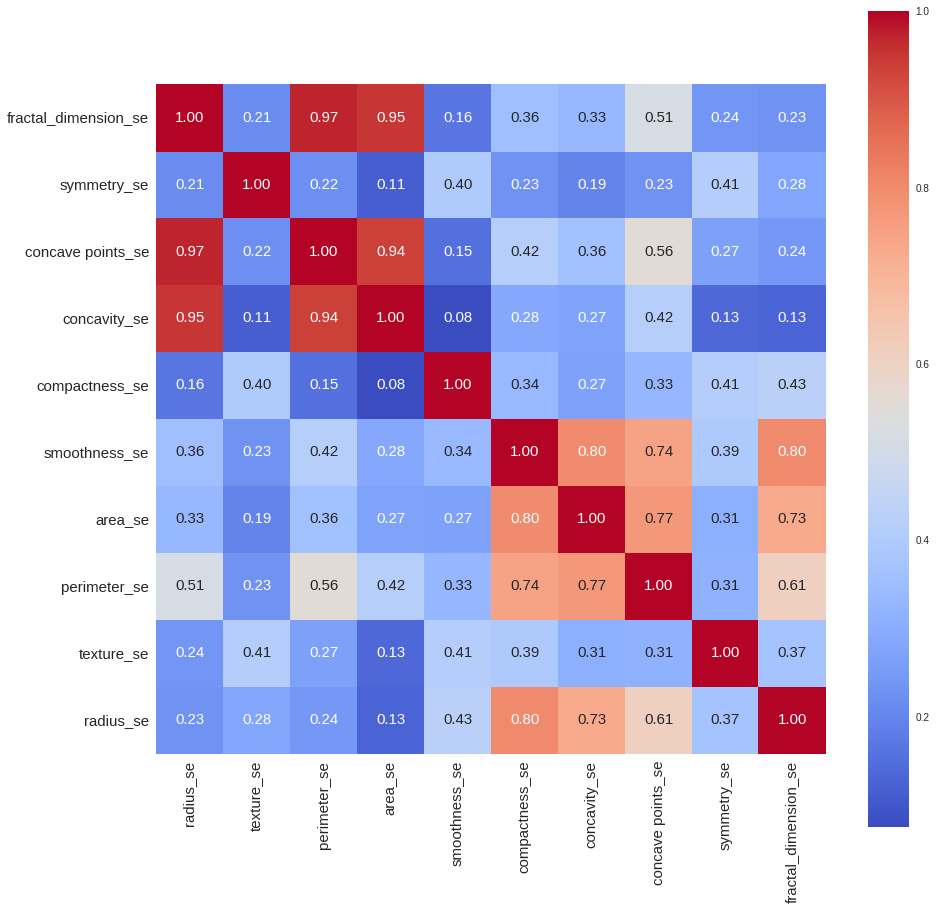

In [5]:
corr = x[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (15,15)

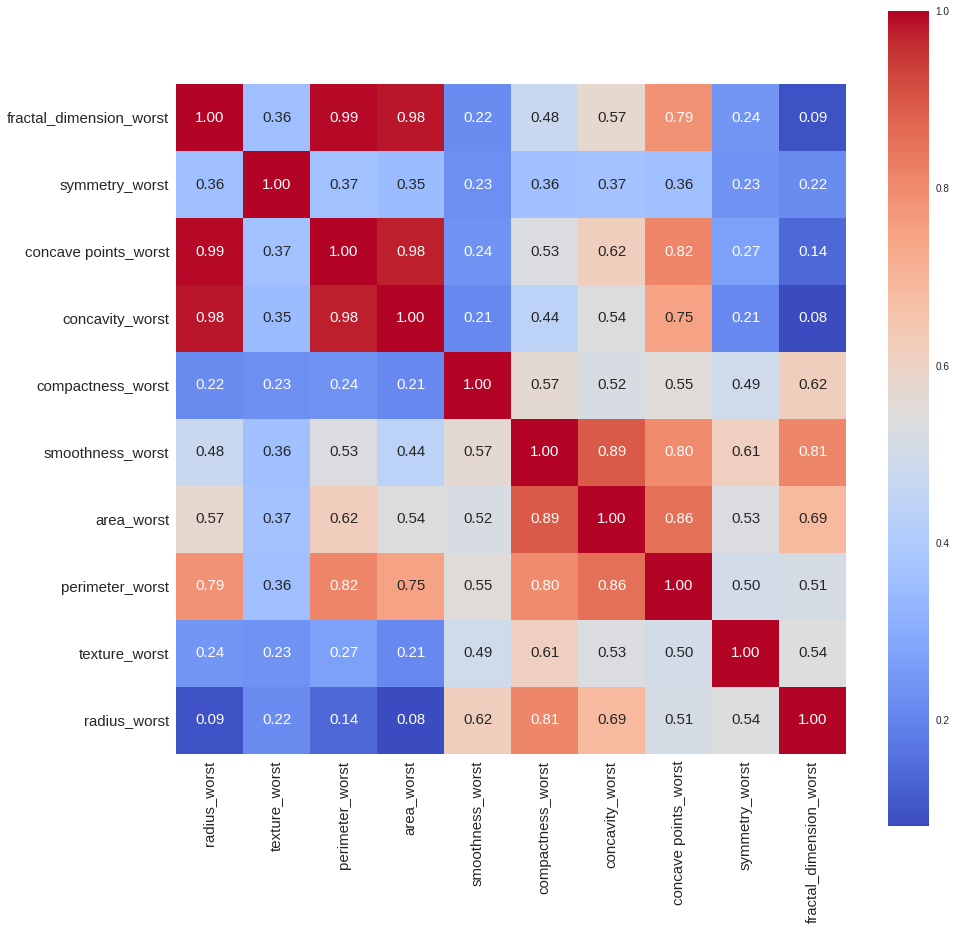

In [6]:
corr = x[features_worst].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (15,15)

Lets go ahead and move on to preprocessing our data in order to apply our ML classifiers. In addition, we need to break out or data into a training and test set

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


#Split data to get hold out test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

The next chunk of code will help us automate the next few steps. This function accepts three inputs:
1) The kernel used for PCA
2) Which classifier we will be using
3) The name of the classifier (used for plot title)

This function will output the confusion matrix, classification report, and graph of the decision boundary on both the training and test set.

In [8]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.subplot(2,1,1)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.tight_layout()

The next parts will have very little commentary but hopefully you will get the gist of it. There will be multiple classifiers used under different PCA conditions. Lets see what happens!

In [9]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



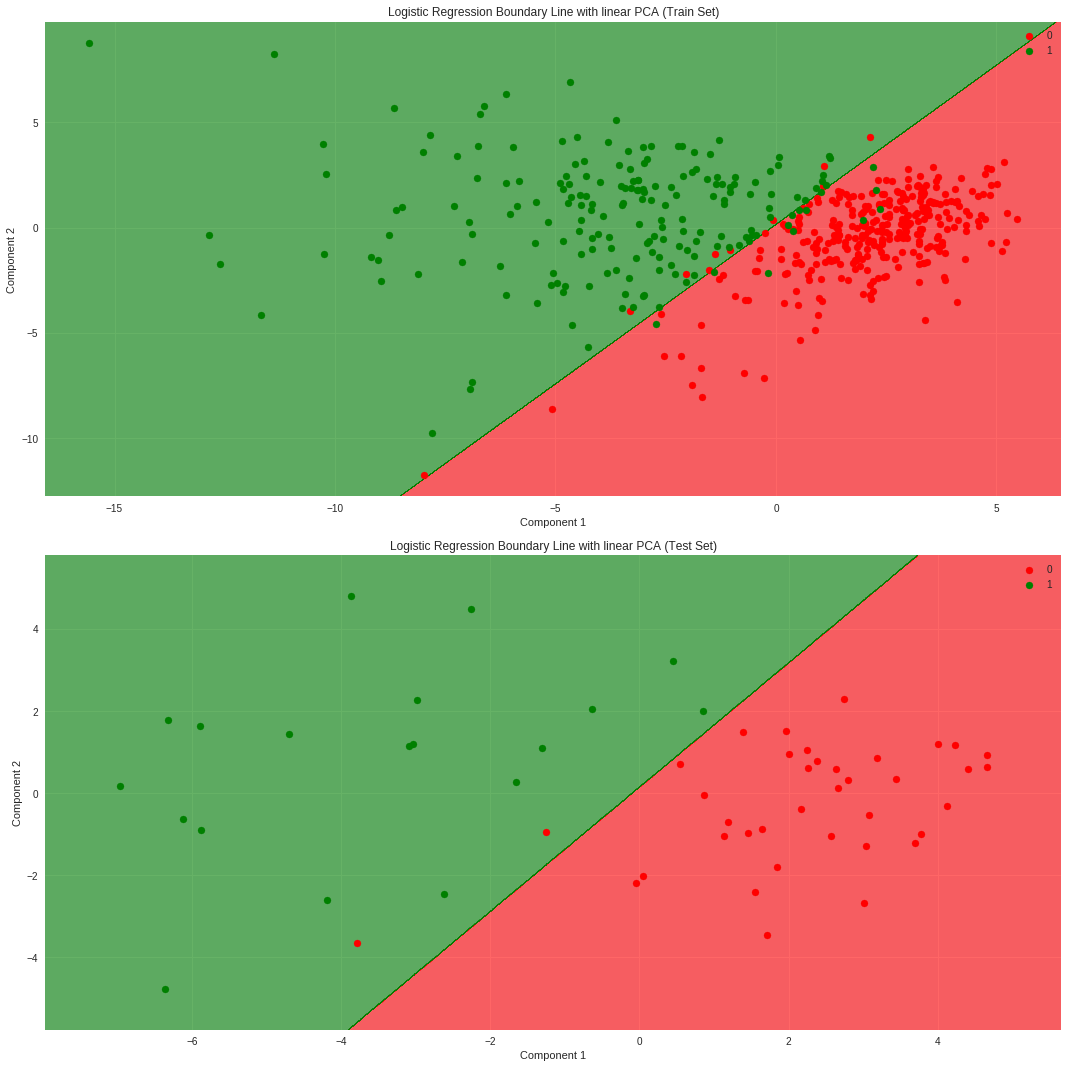

In [10]:
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

[[37  1]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        57



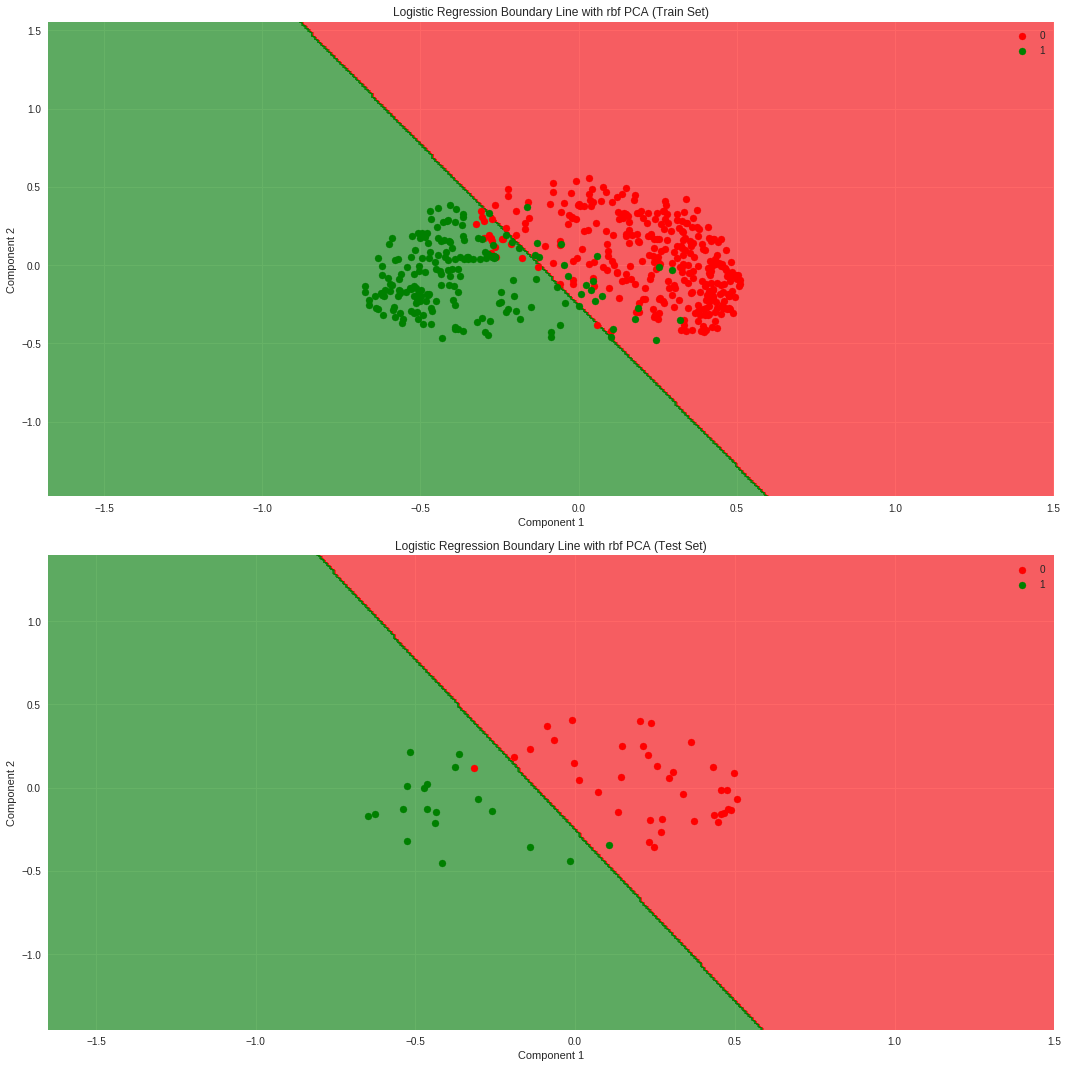

In [11]:
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

[[38  0]
 [ 6 13]]
             precision    recall  f1-score   support

          0       0.86      1.00      0.93        38
          1       1.00      0.68      0.81        19

avg / total       0.91      0.89      0.89        57



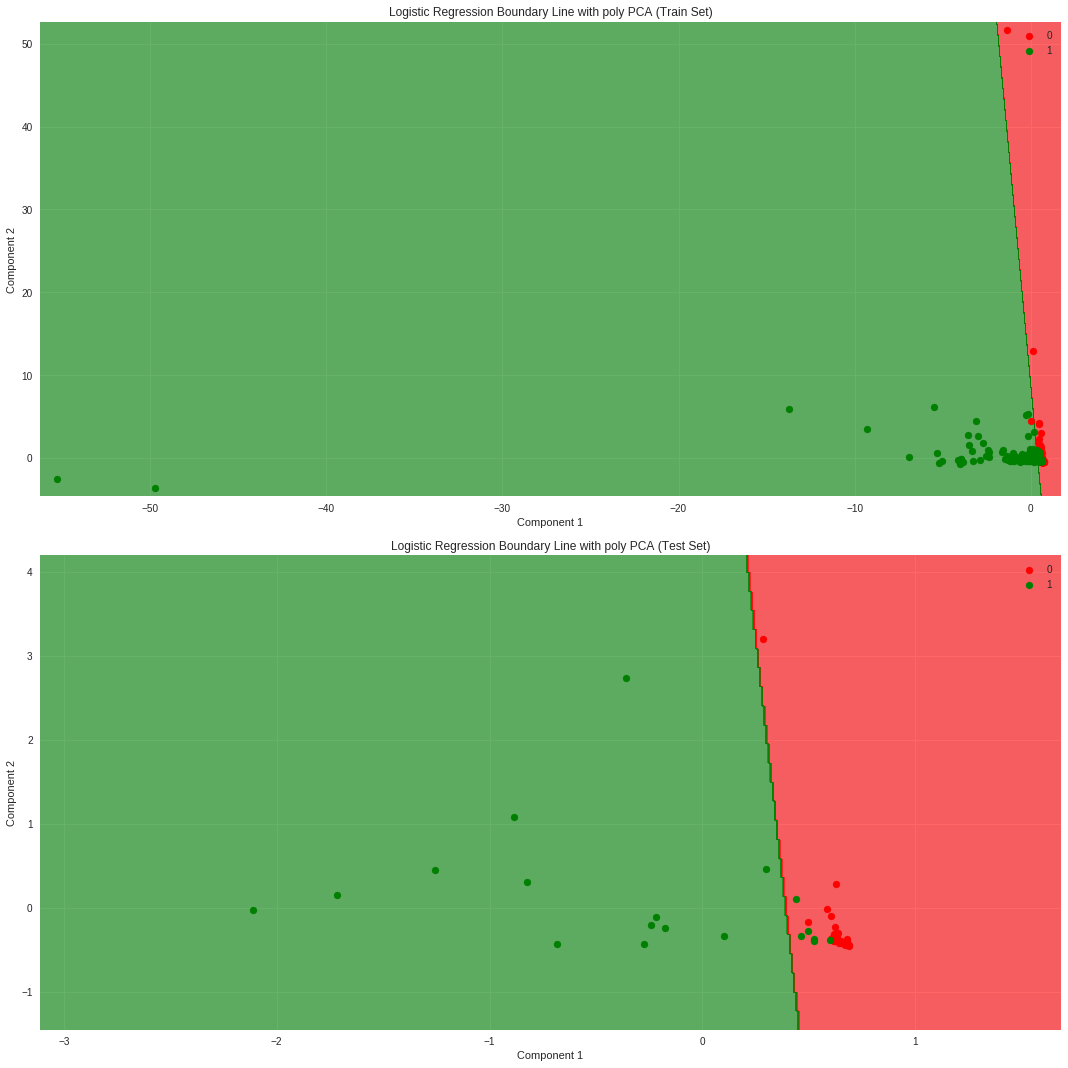

In [12]:
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

[[36  2]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.90      0.95      0.92        19

avg / total       0.95      0.95      0.95        57



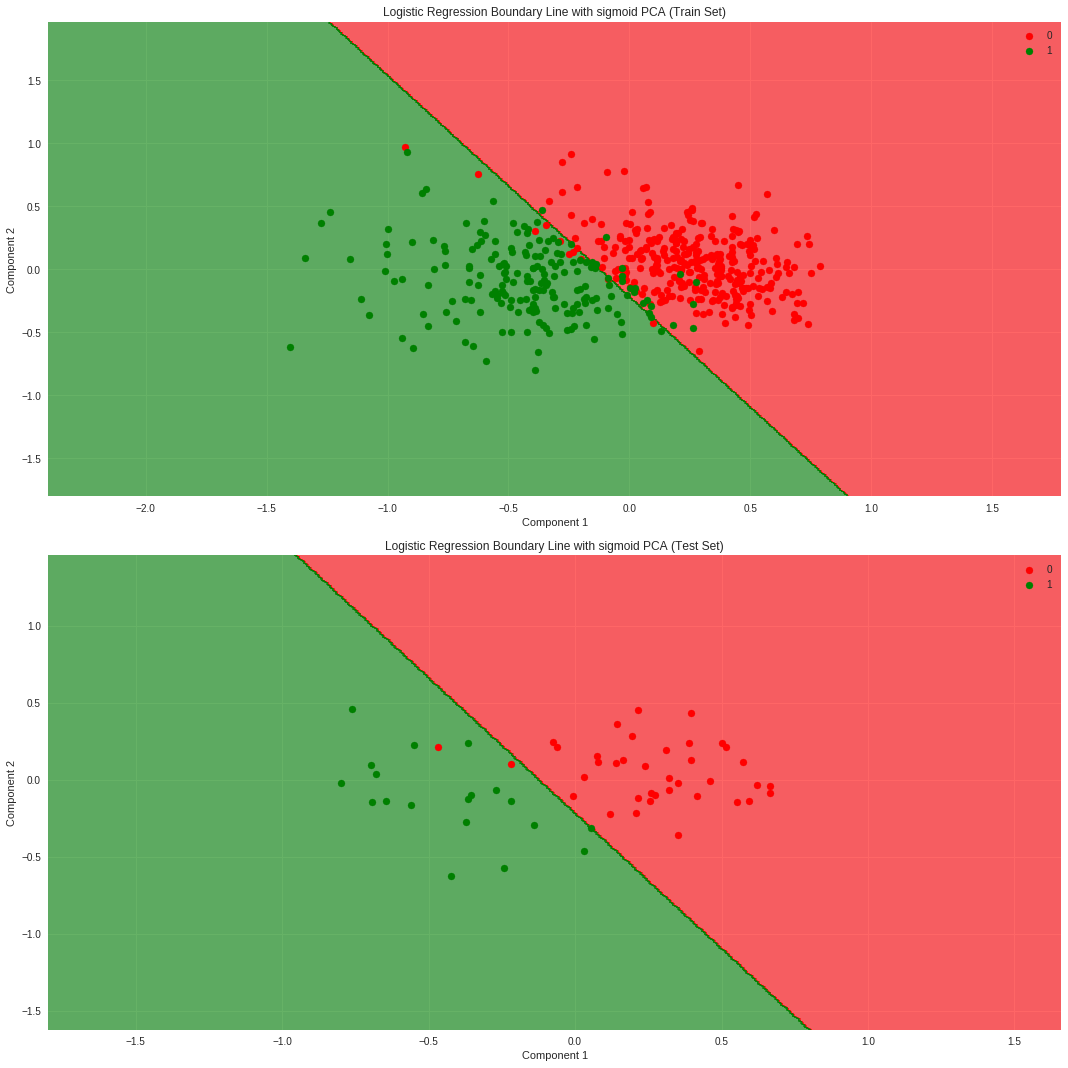

In [13]:
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



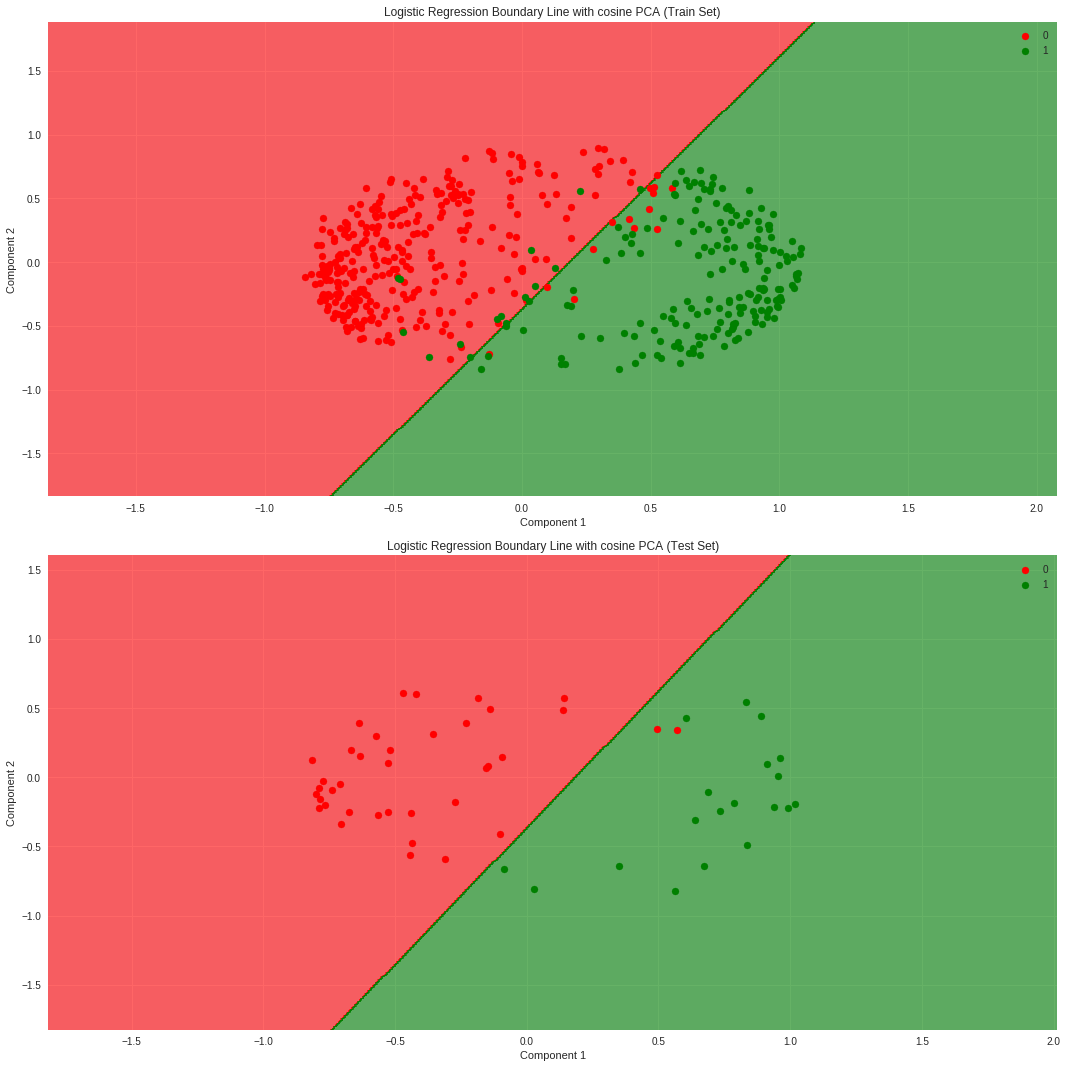

In [14]:
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")

In [15]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

[[36  2]
 [ 2 17]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        38
          1       0.89      0.89      0.89        19

avg / total       0.93      0.93      0.93        57



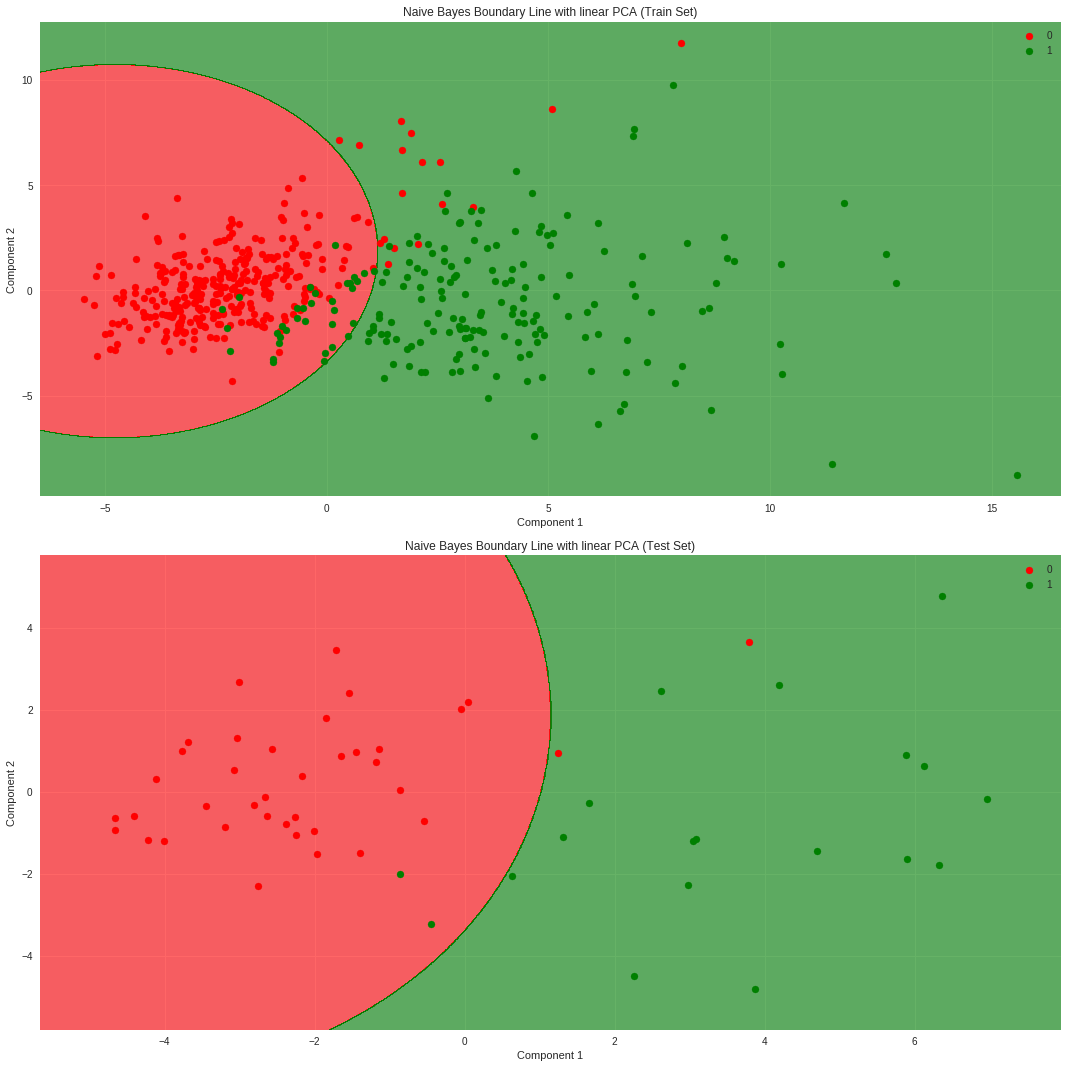

In [16]:
BoundaryLine('linear', GaussianNB(), "Naive Bayes")

[[36  2]
 [ 2 17]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        38
          1       0.89      0.89      0.89        19

avg / total       0.93      0.93      0.93        57



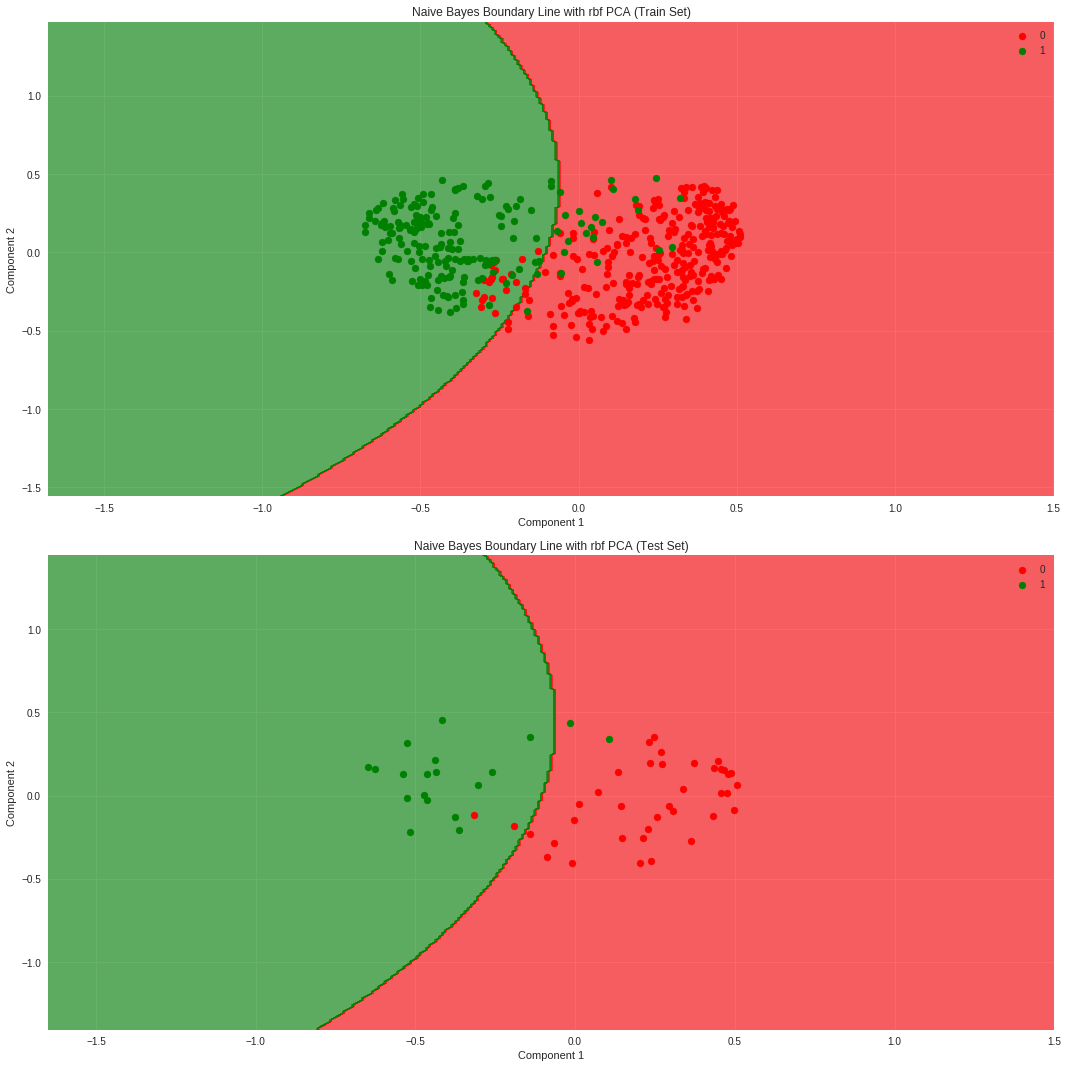

In [17]:
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")

[[38  0]
 [ 7 12]]
             precision    recall  f1-score   support

          0       0.84      1.00      0.92        38
          1       1.00      0.63      0.77        19

avg / total       0.90      0.88      0.87        57



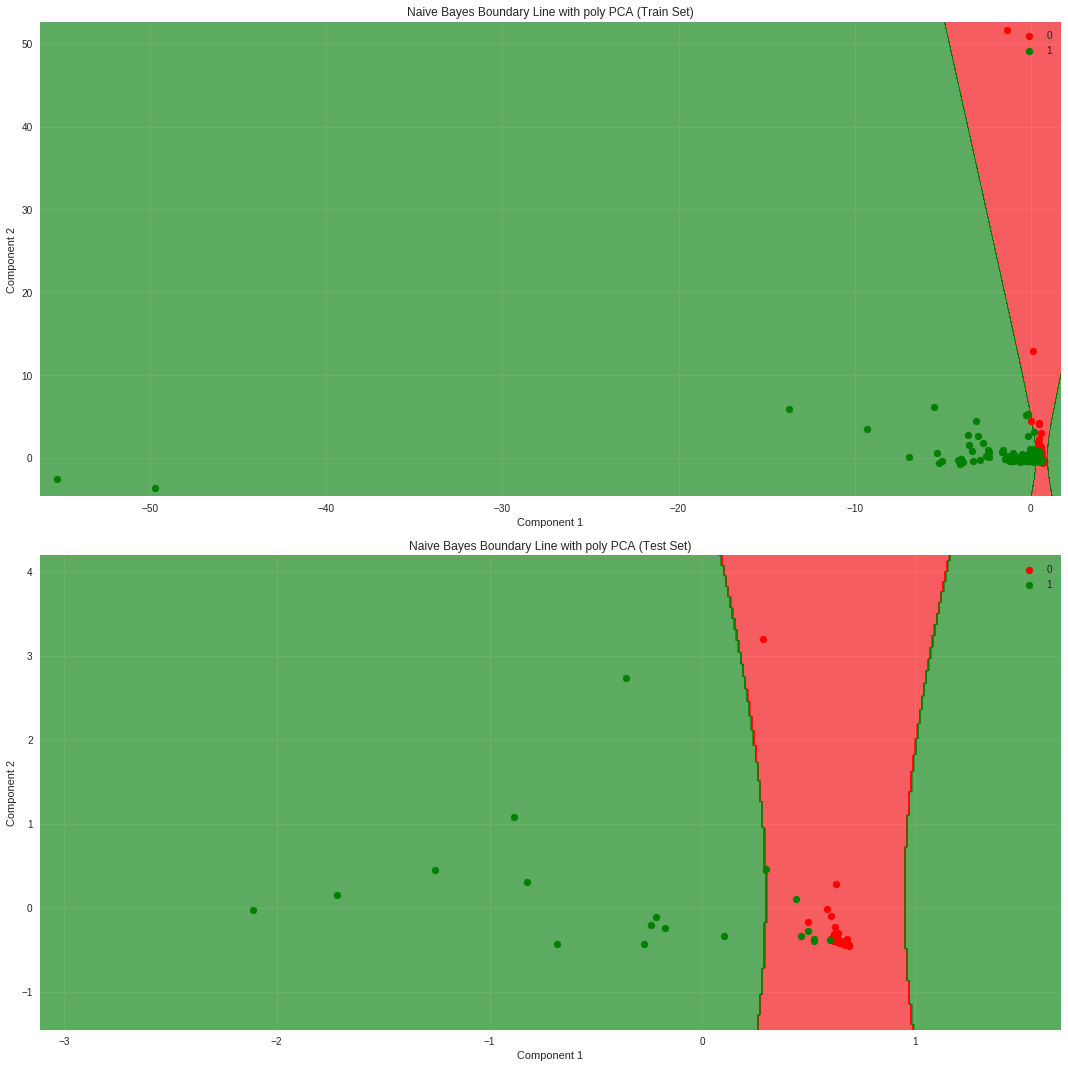

In [18]:
BoundaryLine('poly', GaussianNB(), "Naive Bayes")

[[36  2]
 [ 2 17]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        38
          1       0.89      0.89      0.89        19

avg / total       0.93      0.93      0.93        57



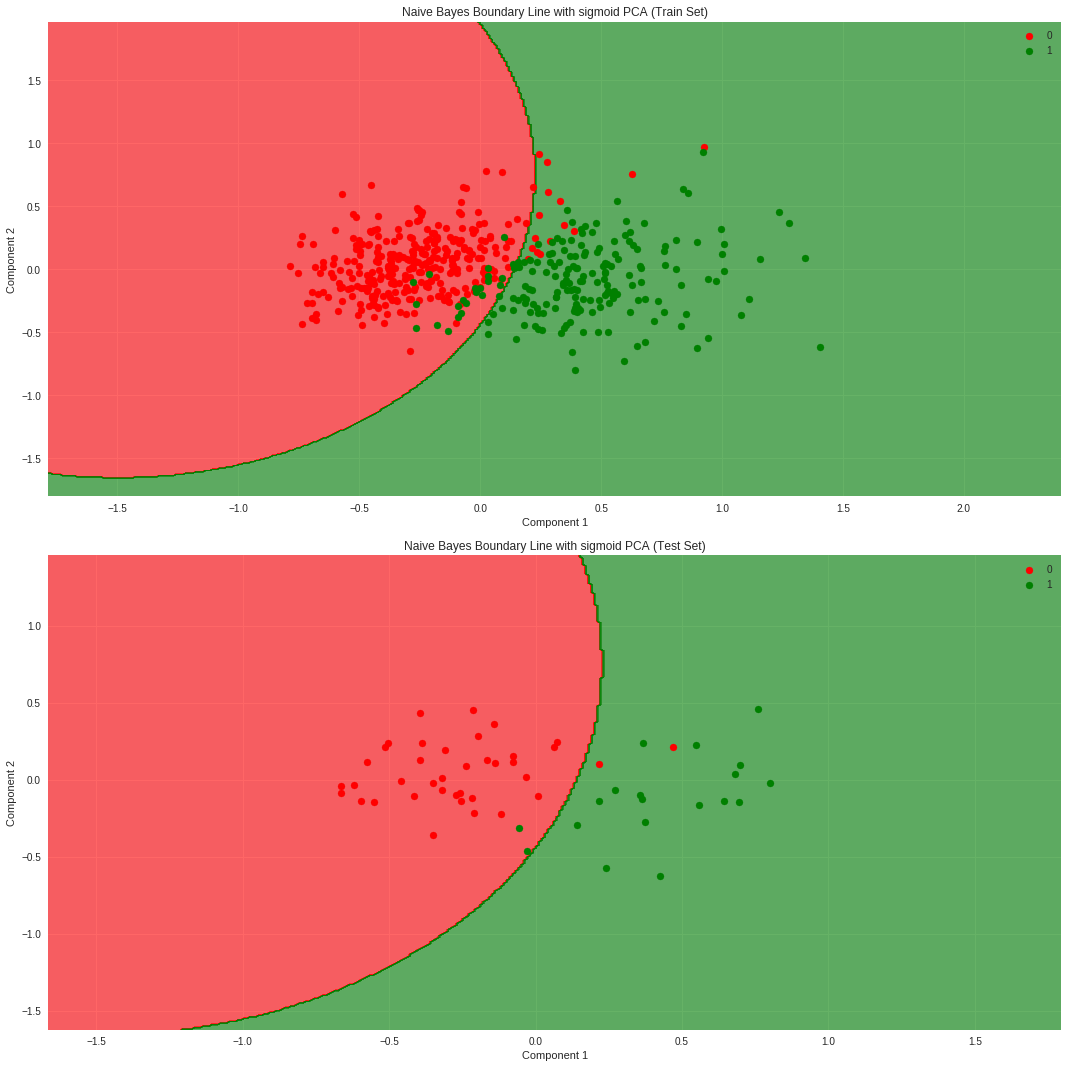

In [19]:
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")

[[36  2]
 [ 2 17]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        38
          1       0.89      0.89      0.89        19

avg / total       0.93      0.93      0.93        57



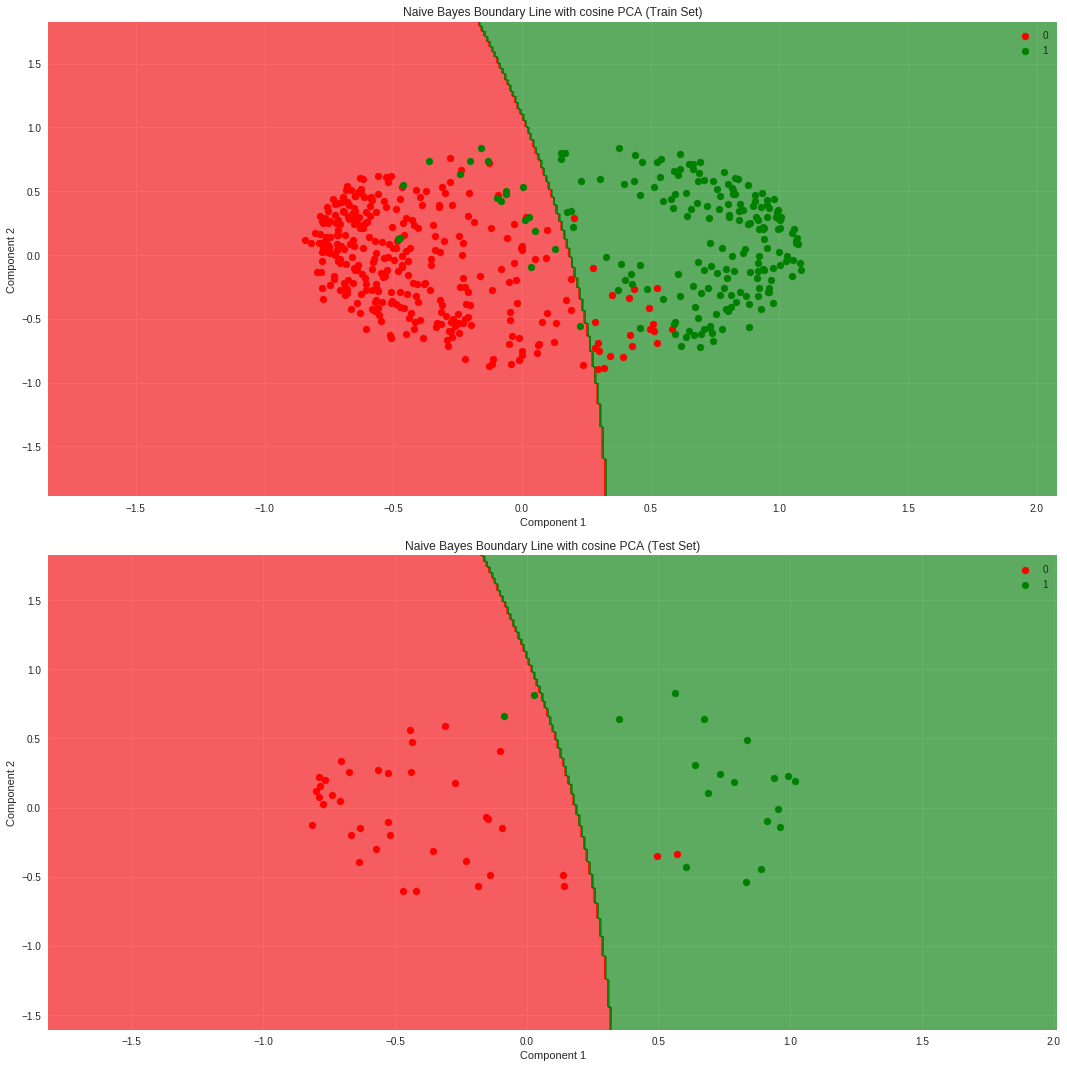

In [20]:
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

In [21]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

[[35  3]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.92      0.96        38
          1       0.86      1.00      0.93        19

avg / total       0.95      0.95      0.95        57



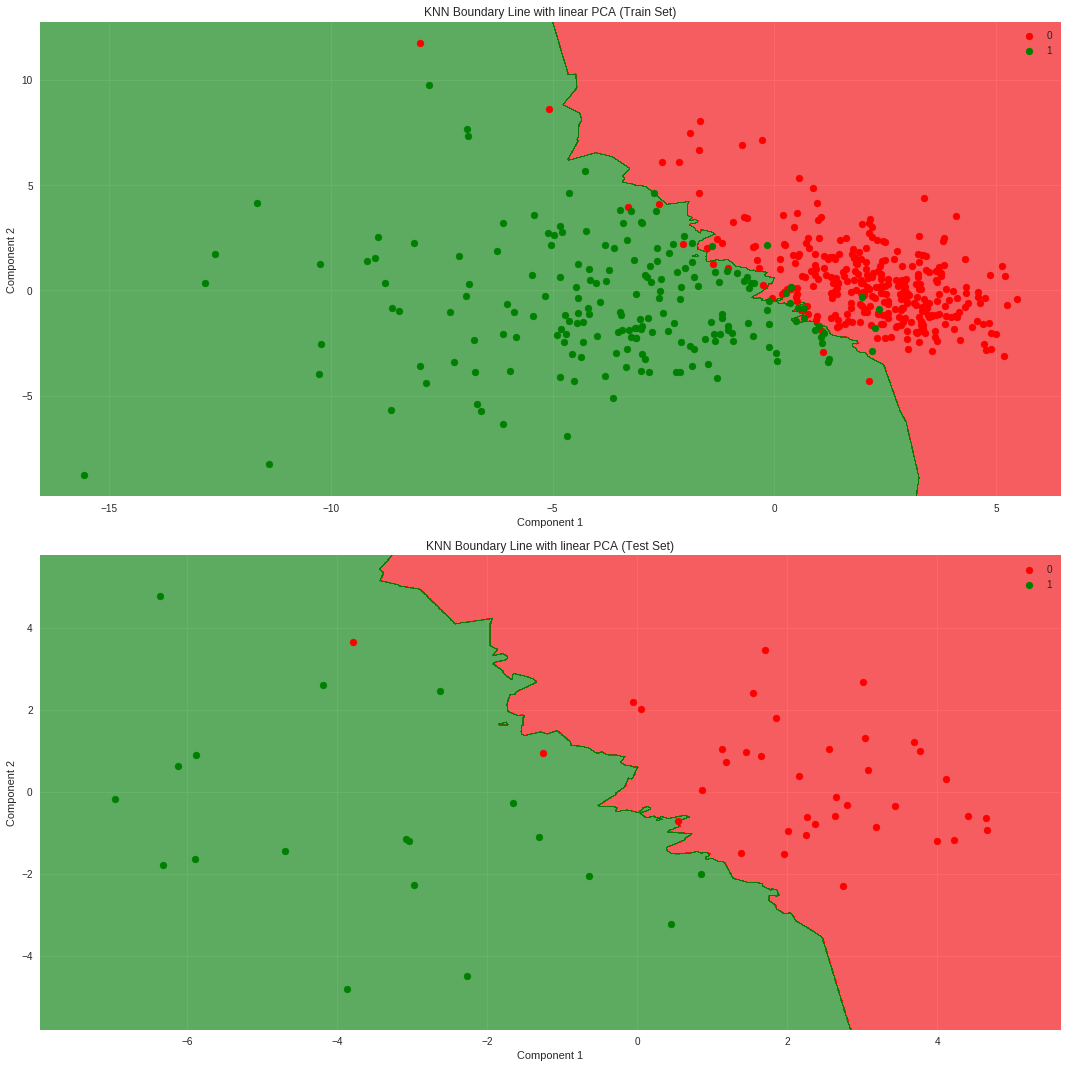

In [22]:
BoundaryLine('linear', KNeighborsClassifier(), "KNN")

[[37  1]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        57



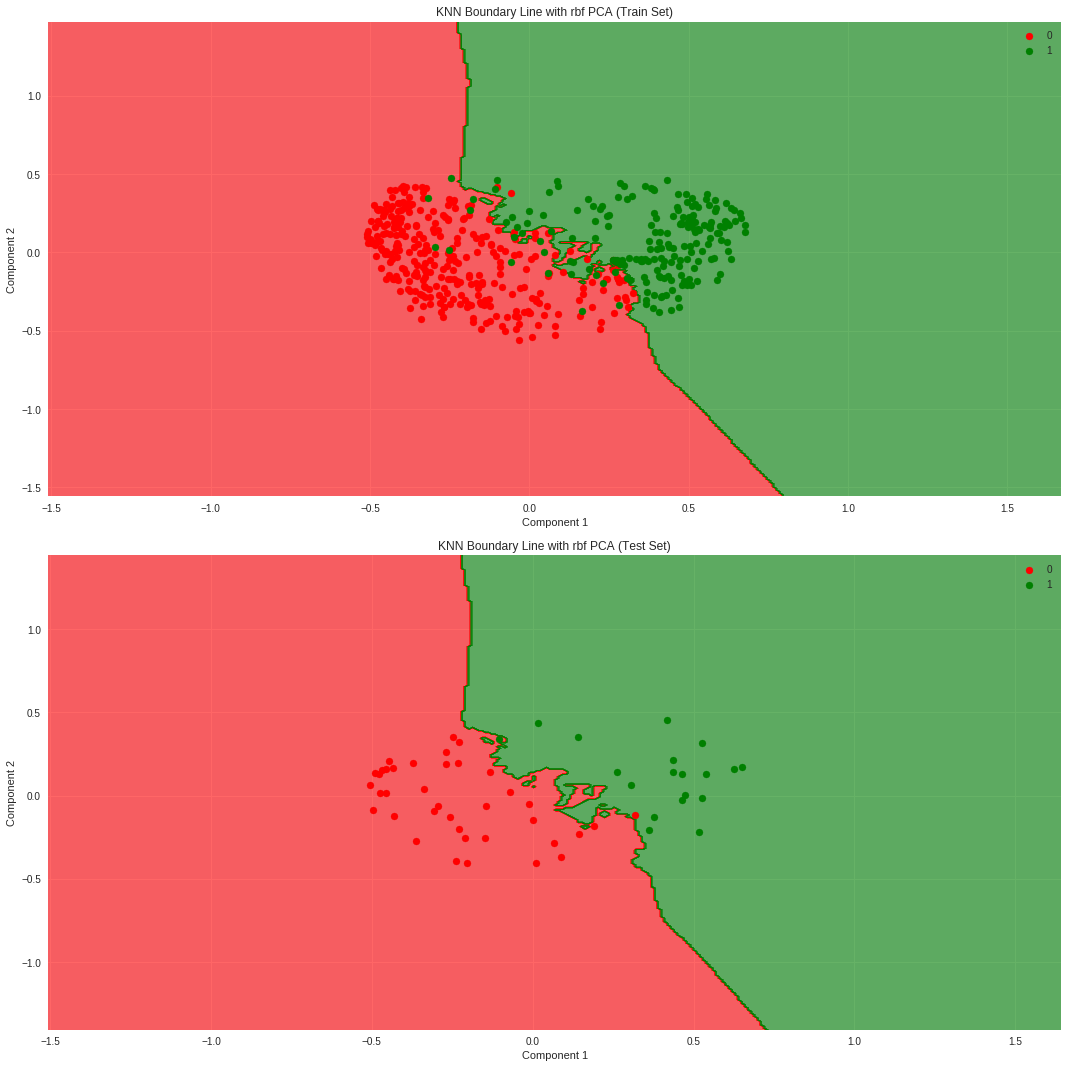

In [23]:
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")

[[37  1]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        57



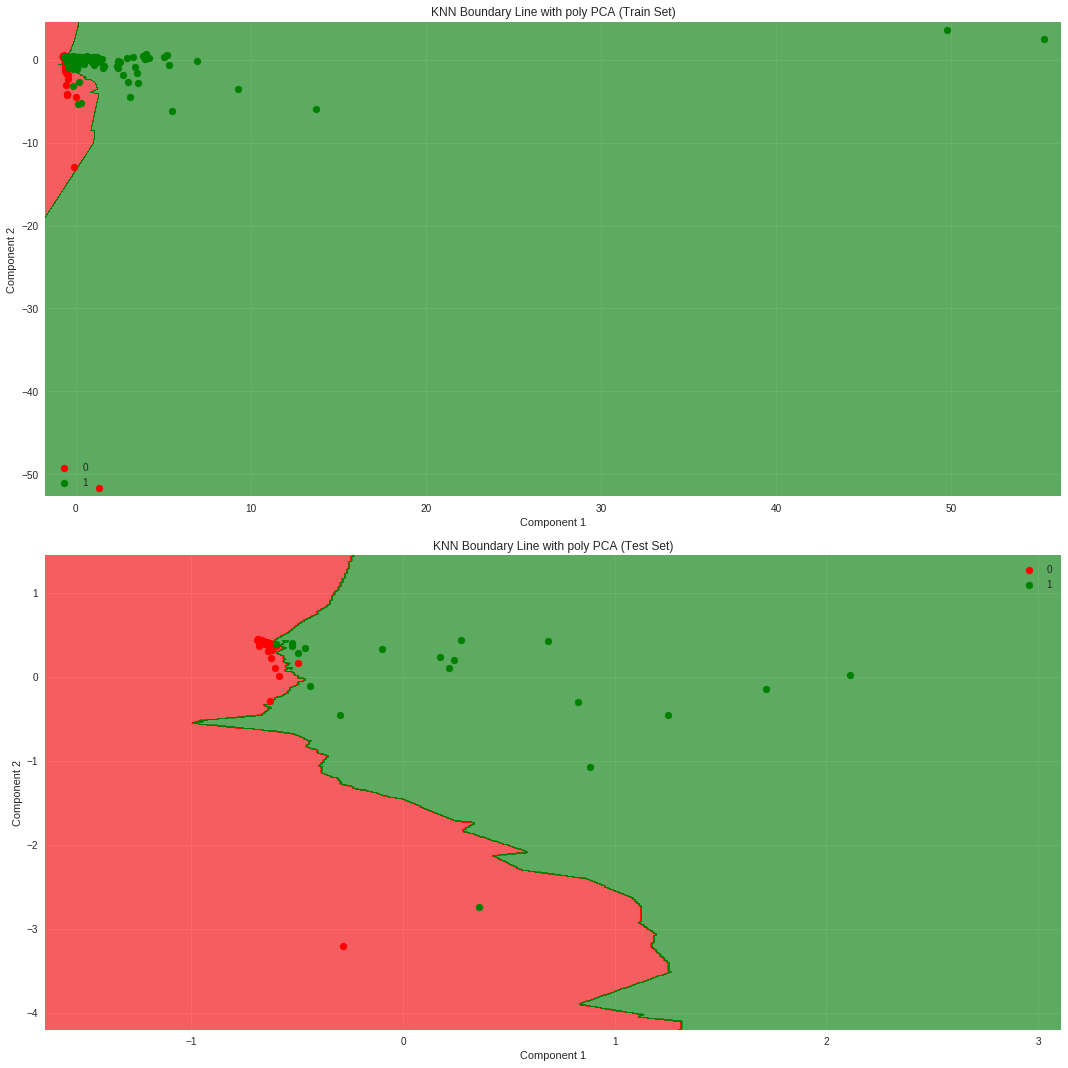

In [24]:
BoundaryLine('poly', KNeighborsClassifier(), "KNN")

[[37  1]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.95      1.00      0.97        19

avg / total       0.98      0.98      0.98        57



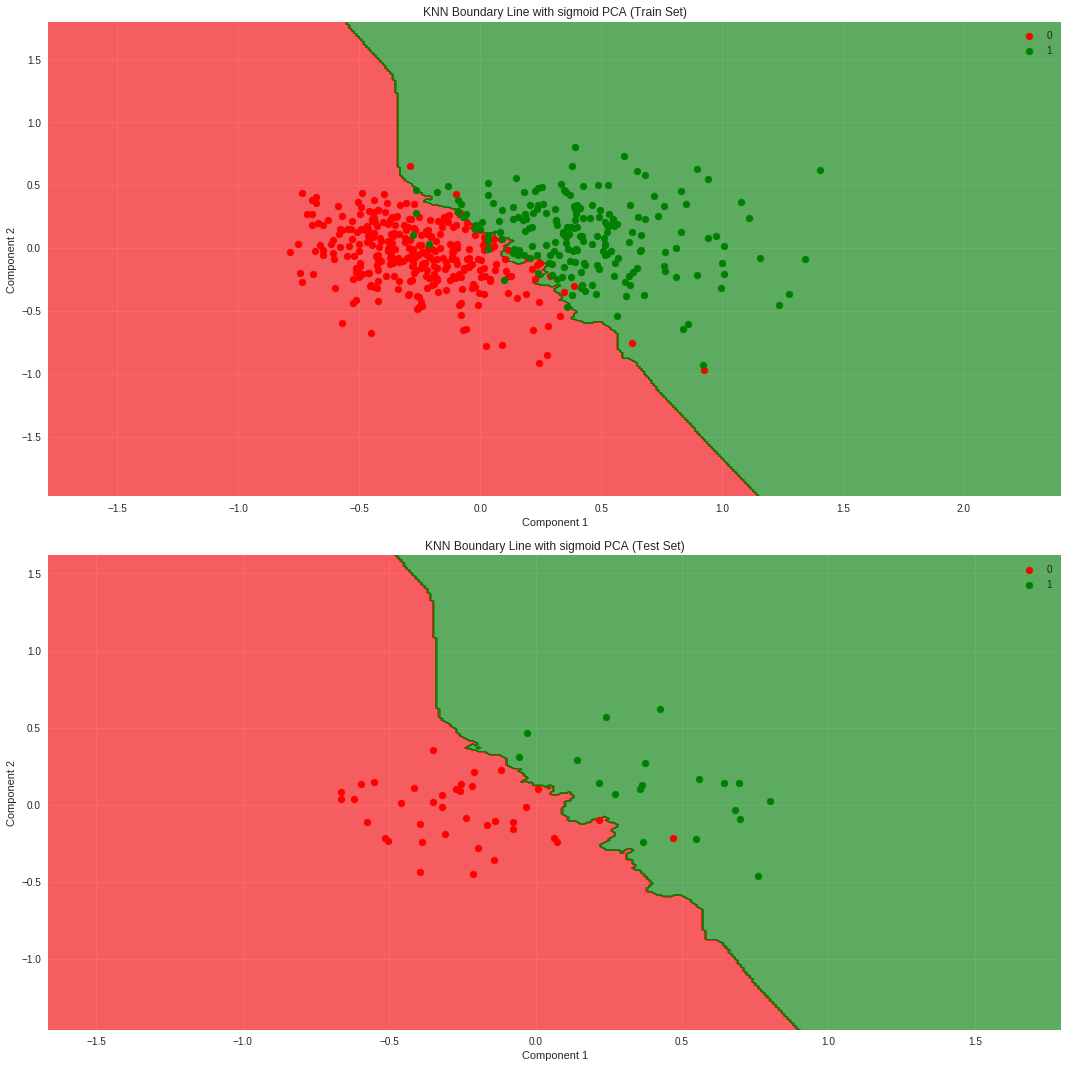

In [25]:
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



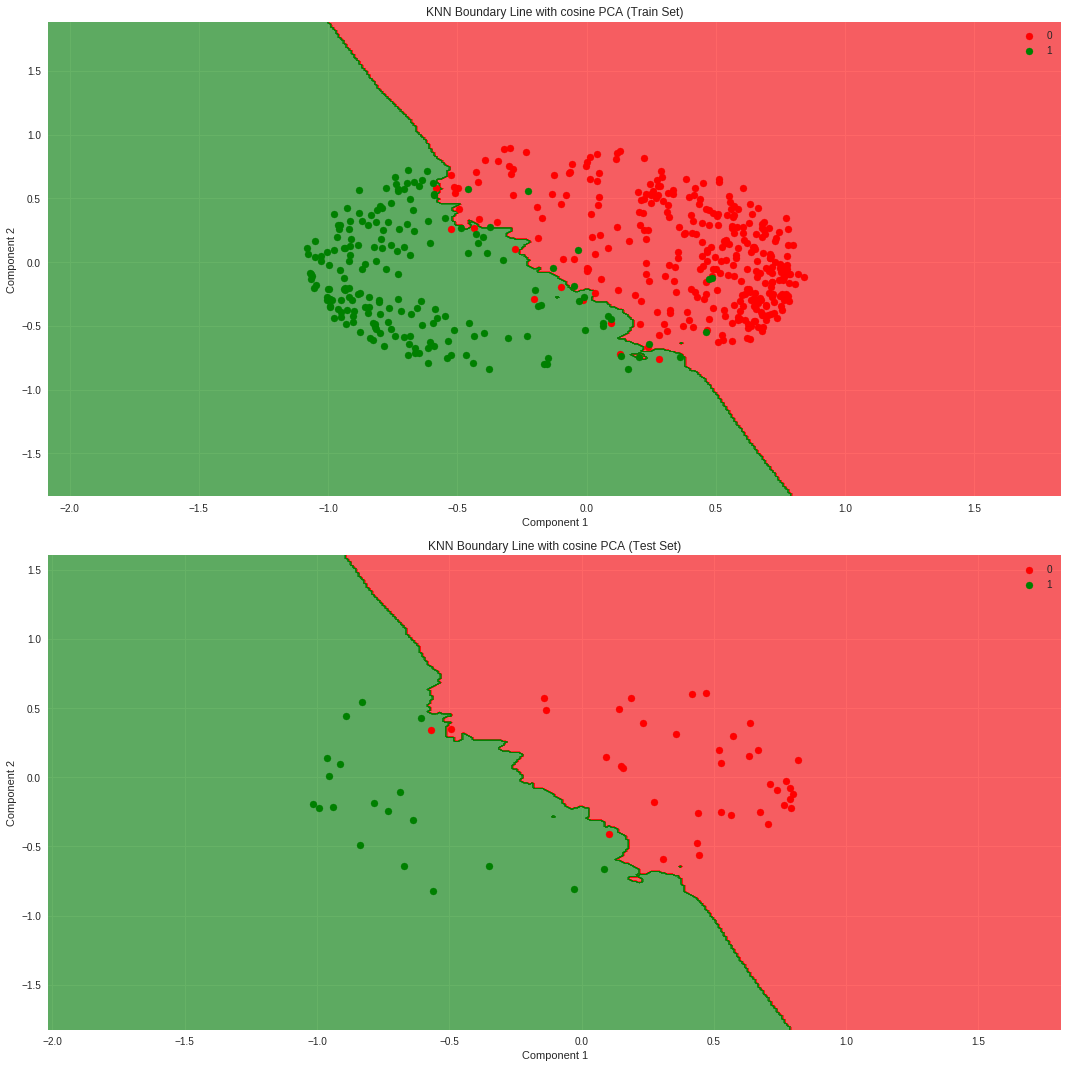

In [26]:
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

[[34  4]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.89      0.94        38
          1       0.83      1.00      0.90        19

avg / total       0.94      0.93      0.93        57



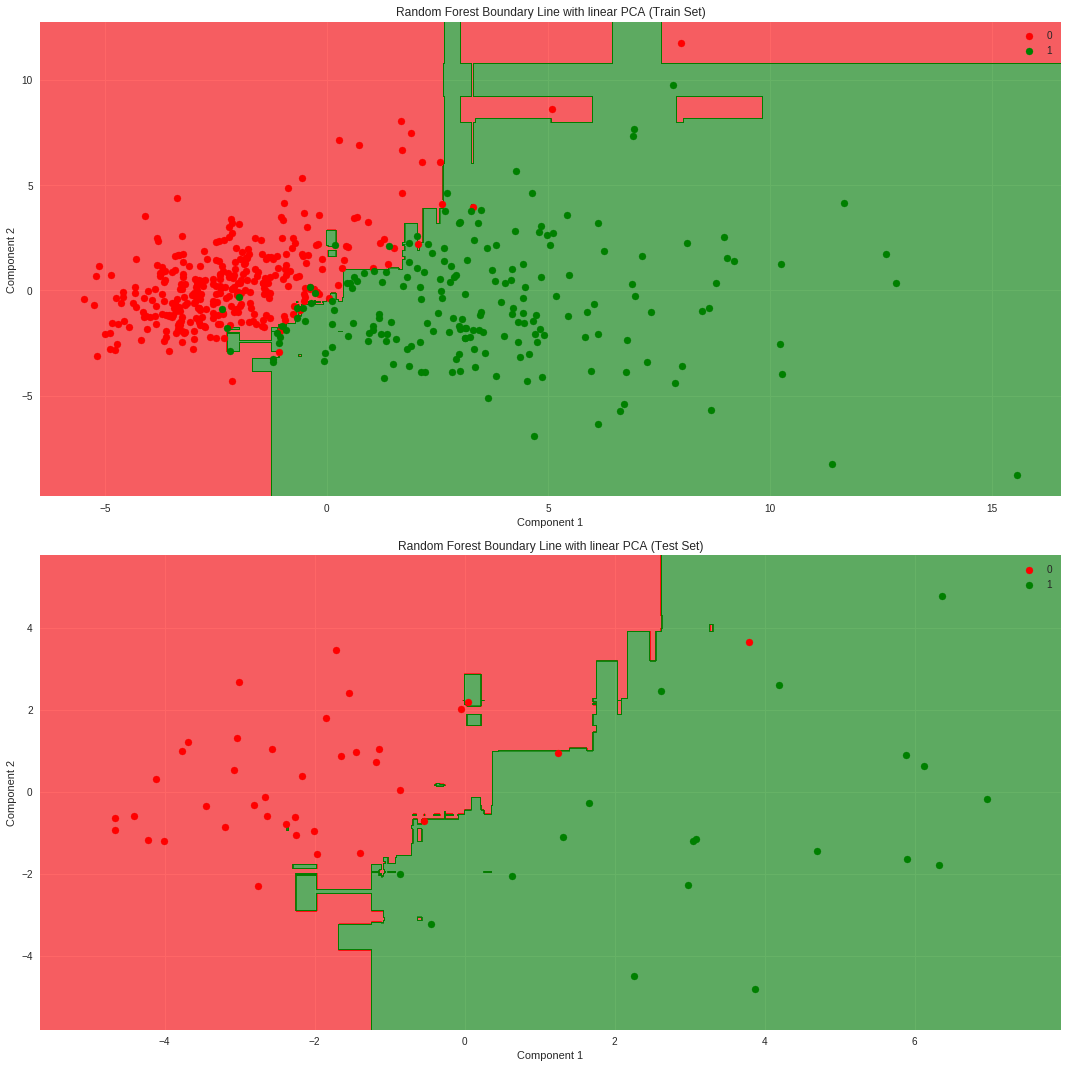

In [28]:
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")

[[37  1]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        57



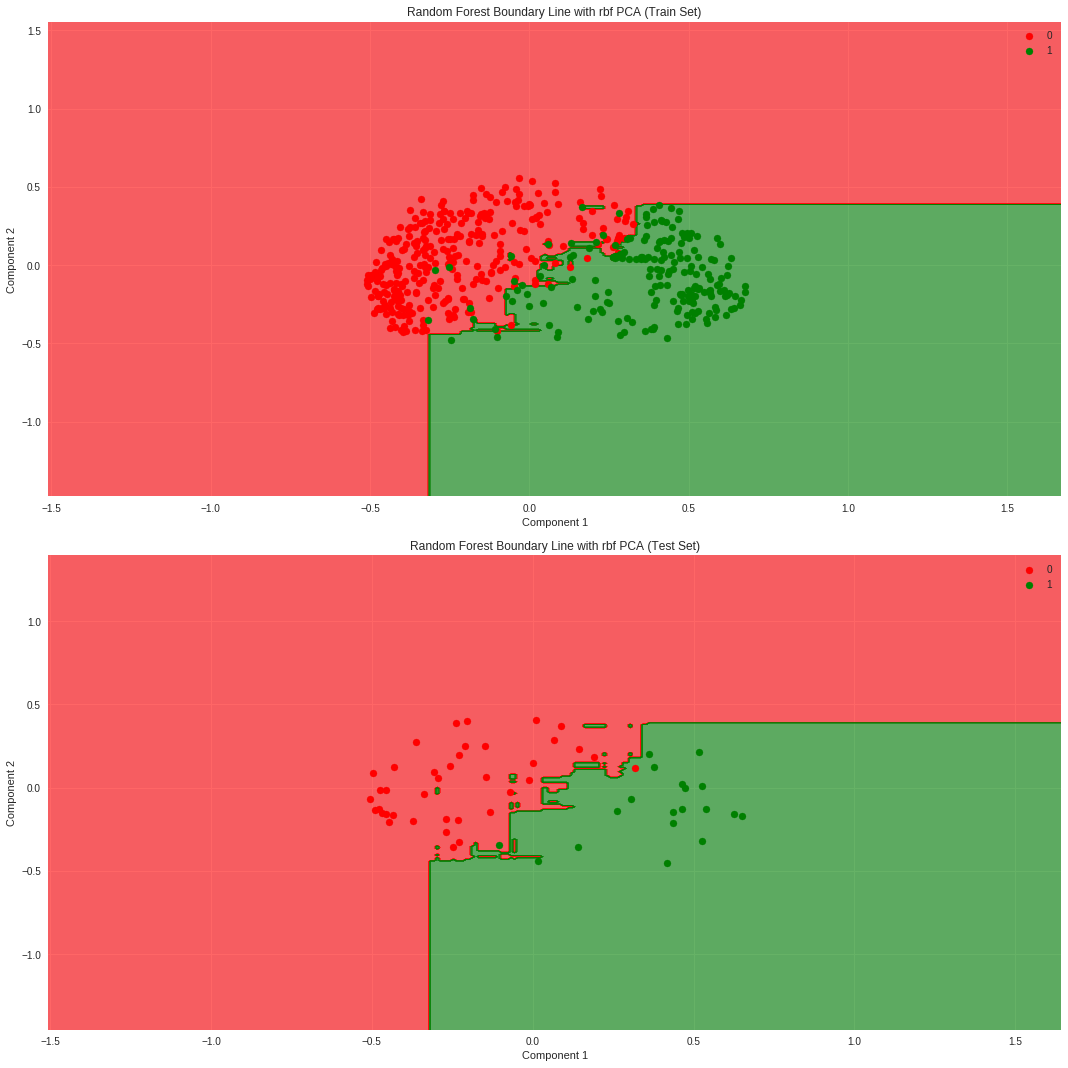

In [29]:
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")

[[36  2]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.90      0.95      0.92        19

avg / total       0.95      0.95      0.95        57



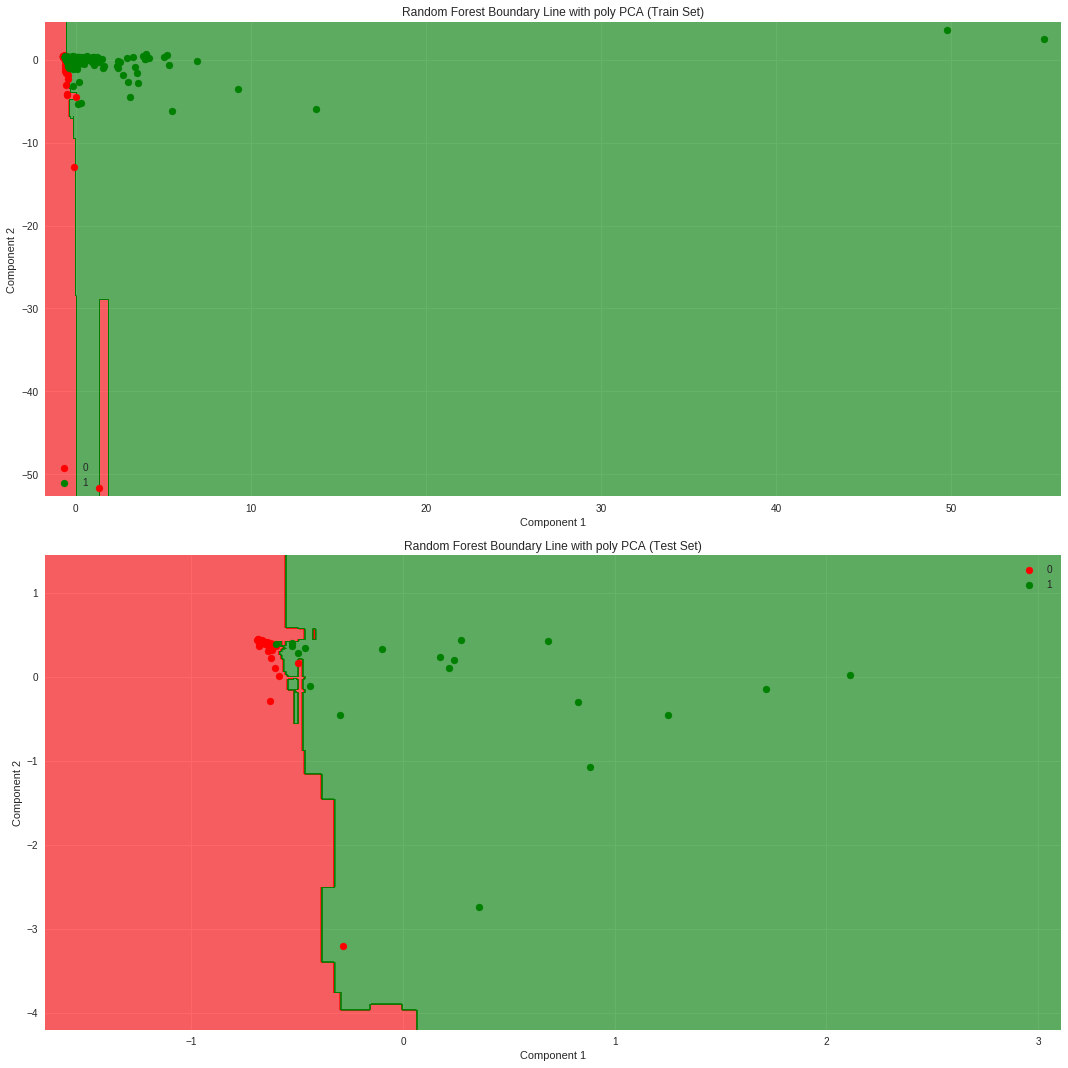

In [30]:
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")

[[37  1]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.95      1.00      0.97        19

avg / total       0.98      0.98      0.98        57



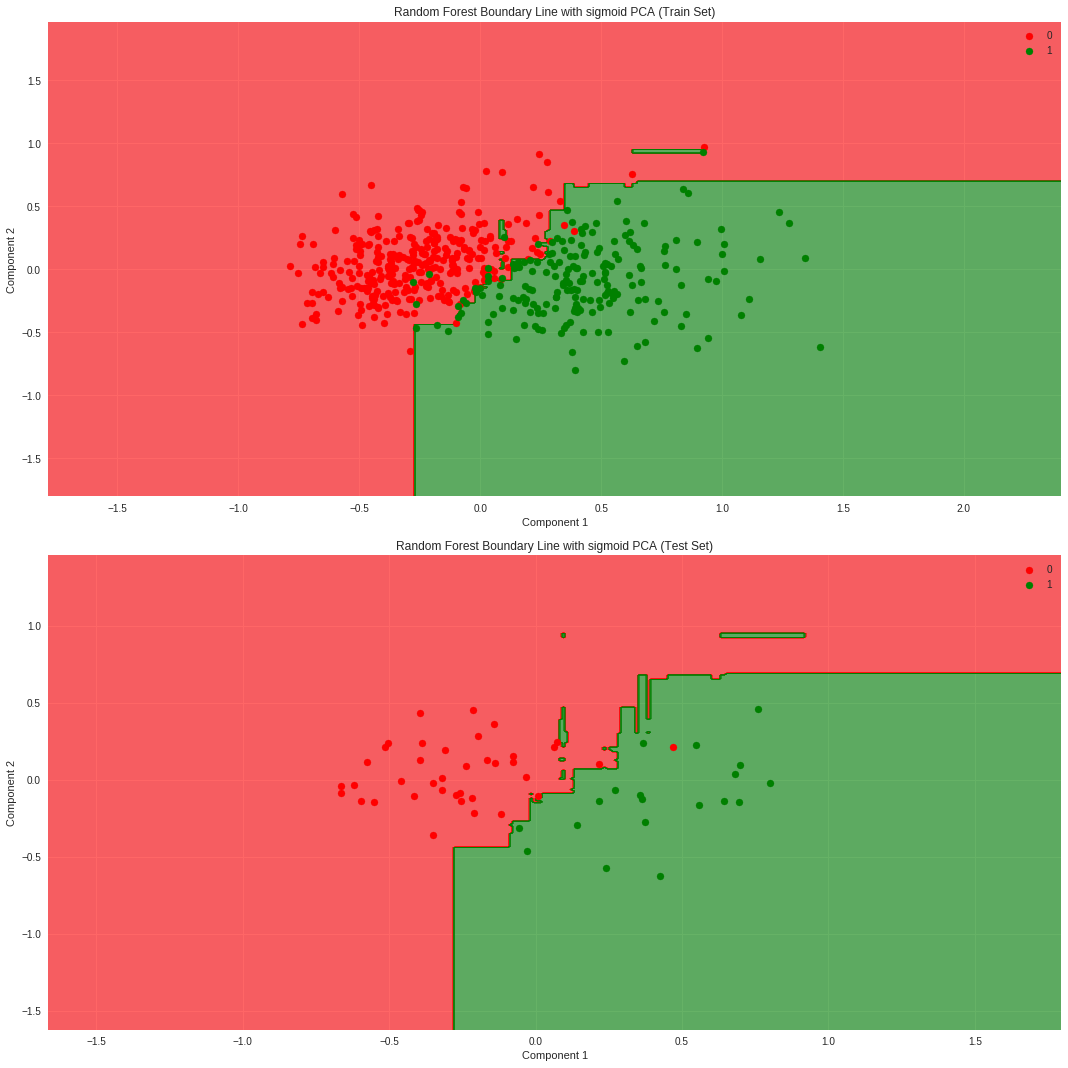

In [31]:
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



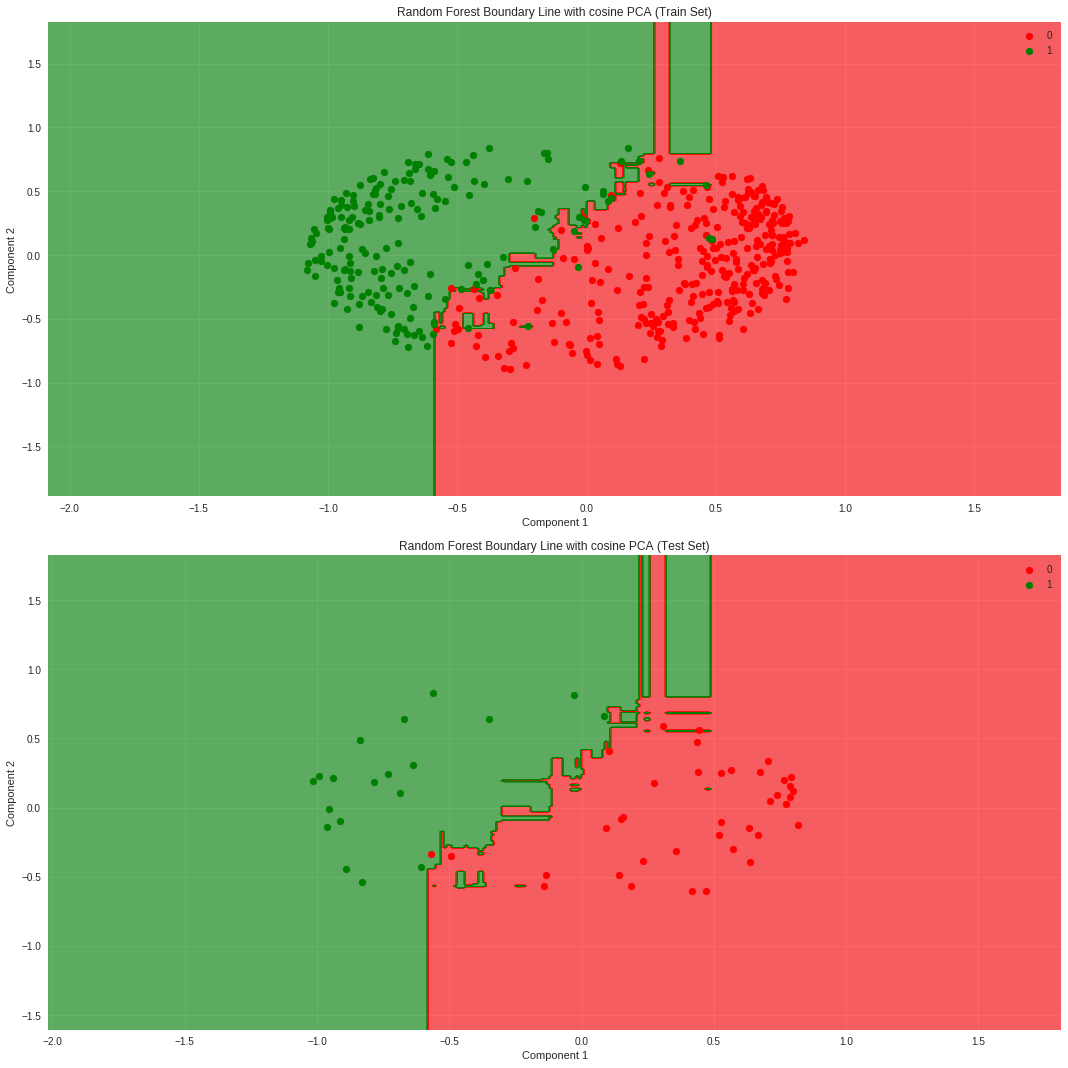

In [32]:
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

In [33]:
#Support Vector - linear
from sklearn.svm import SVC

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



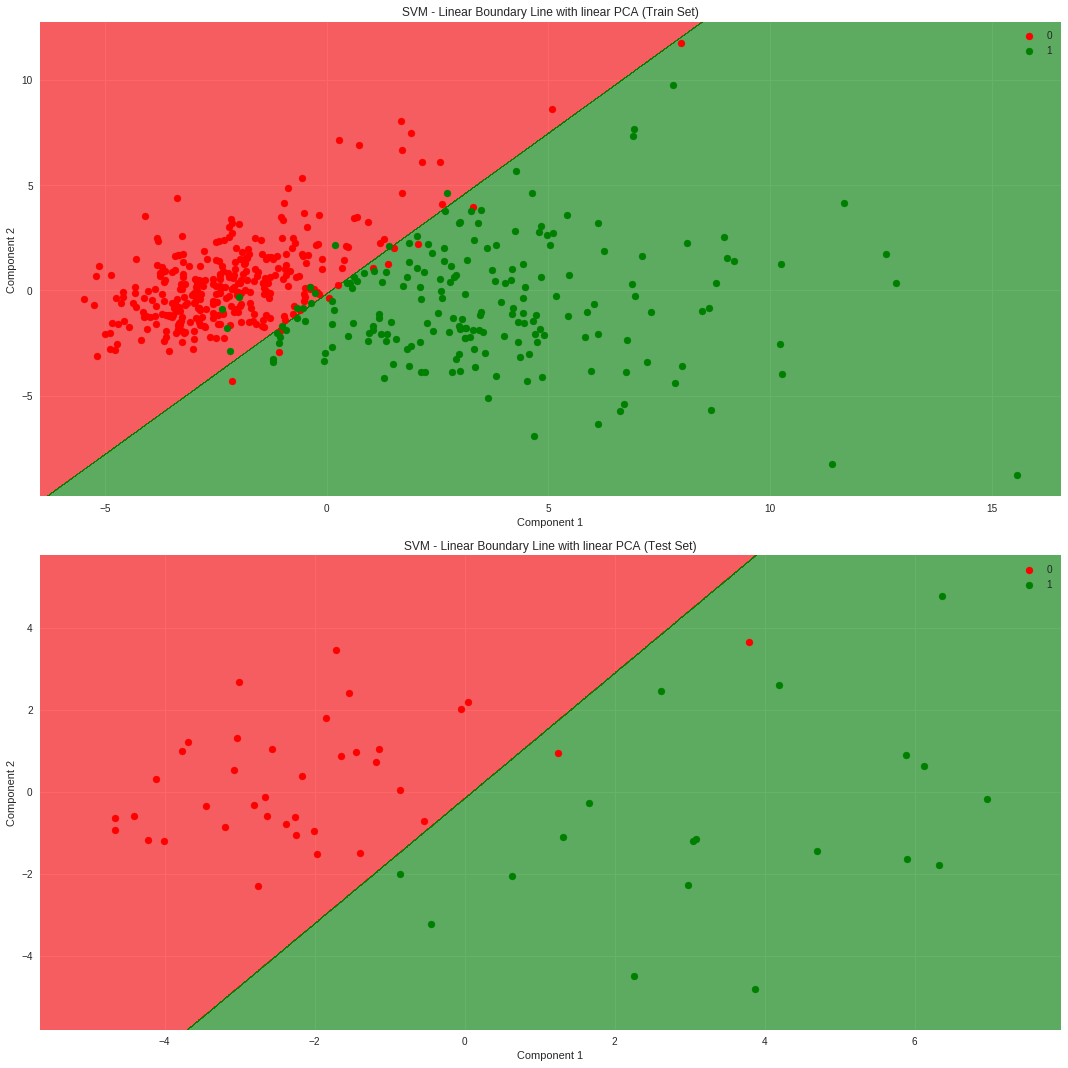

In [34]:
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")

[[36  2]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.90      0.95      0.92        19

avg / total       0.95      0.95      0.95        57



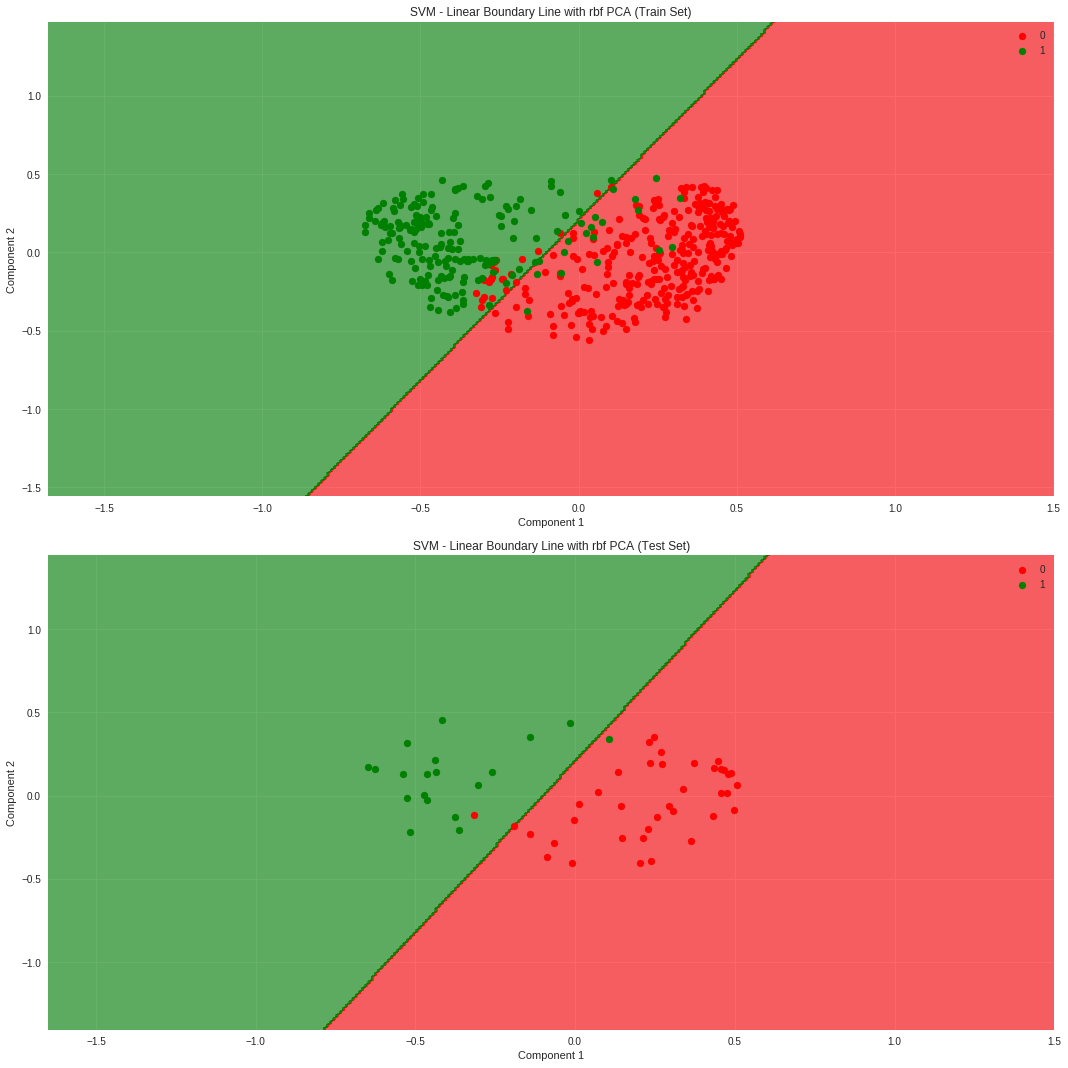

In [35]:
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")

[[37  1]
 [ 4 15]]
             precision    recall  f1-score   support

          0       0.90      0.97      0.94        38
          1       0.94      0.79      0.86        19

avg / total       0.91      0.91      0.91        57



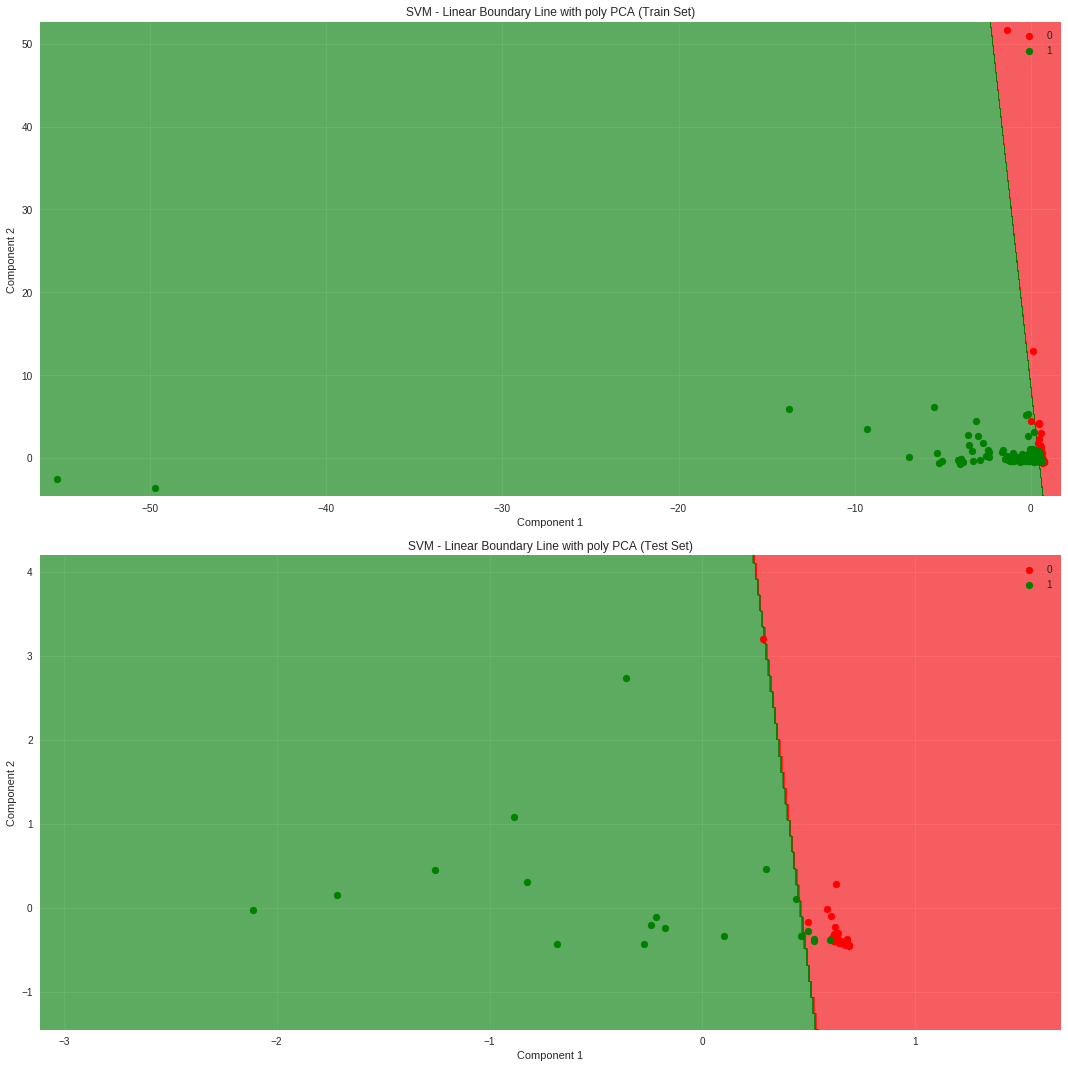

In [36]:
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



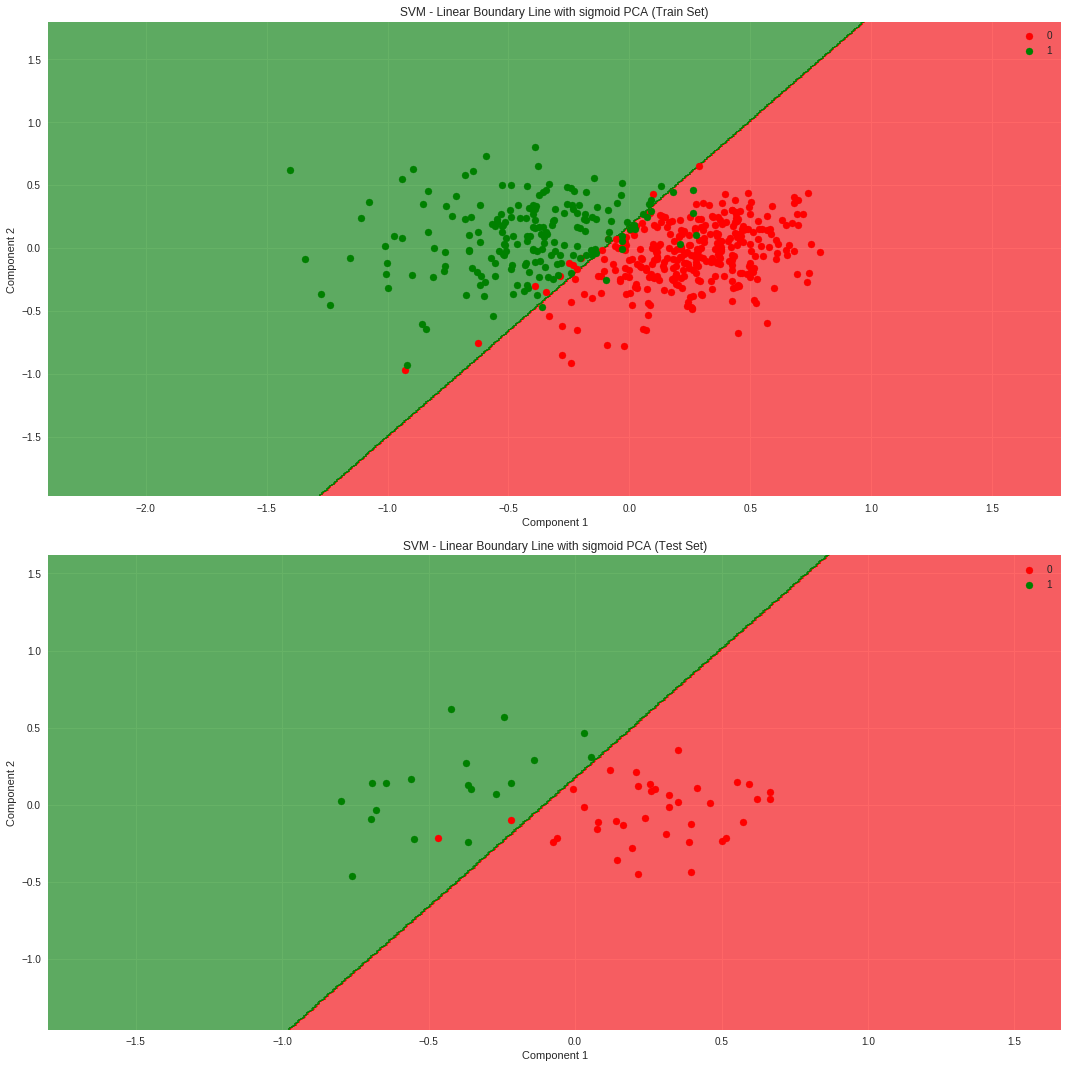

In [37]:
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



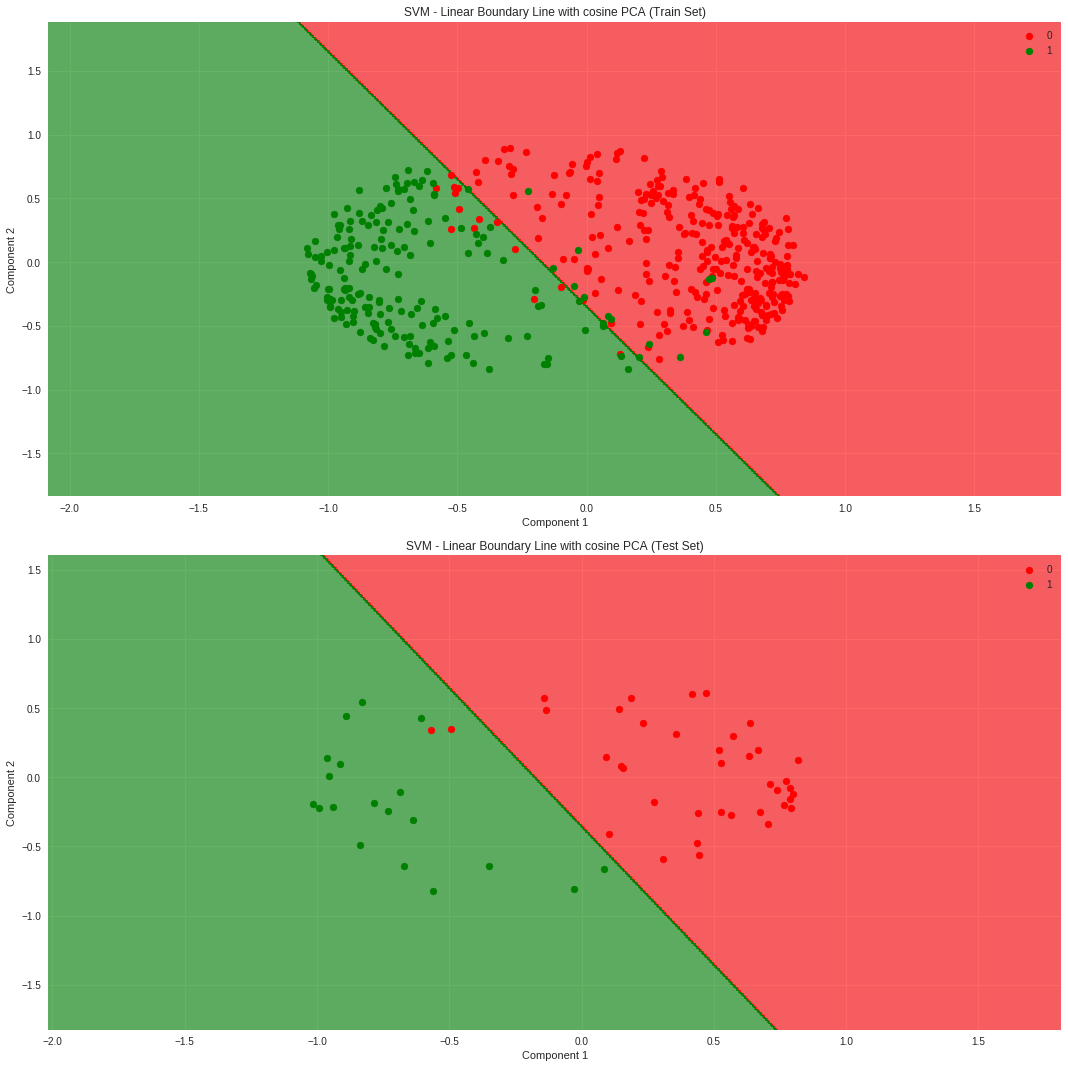

In [38]:
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



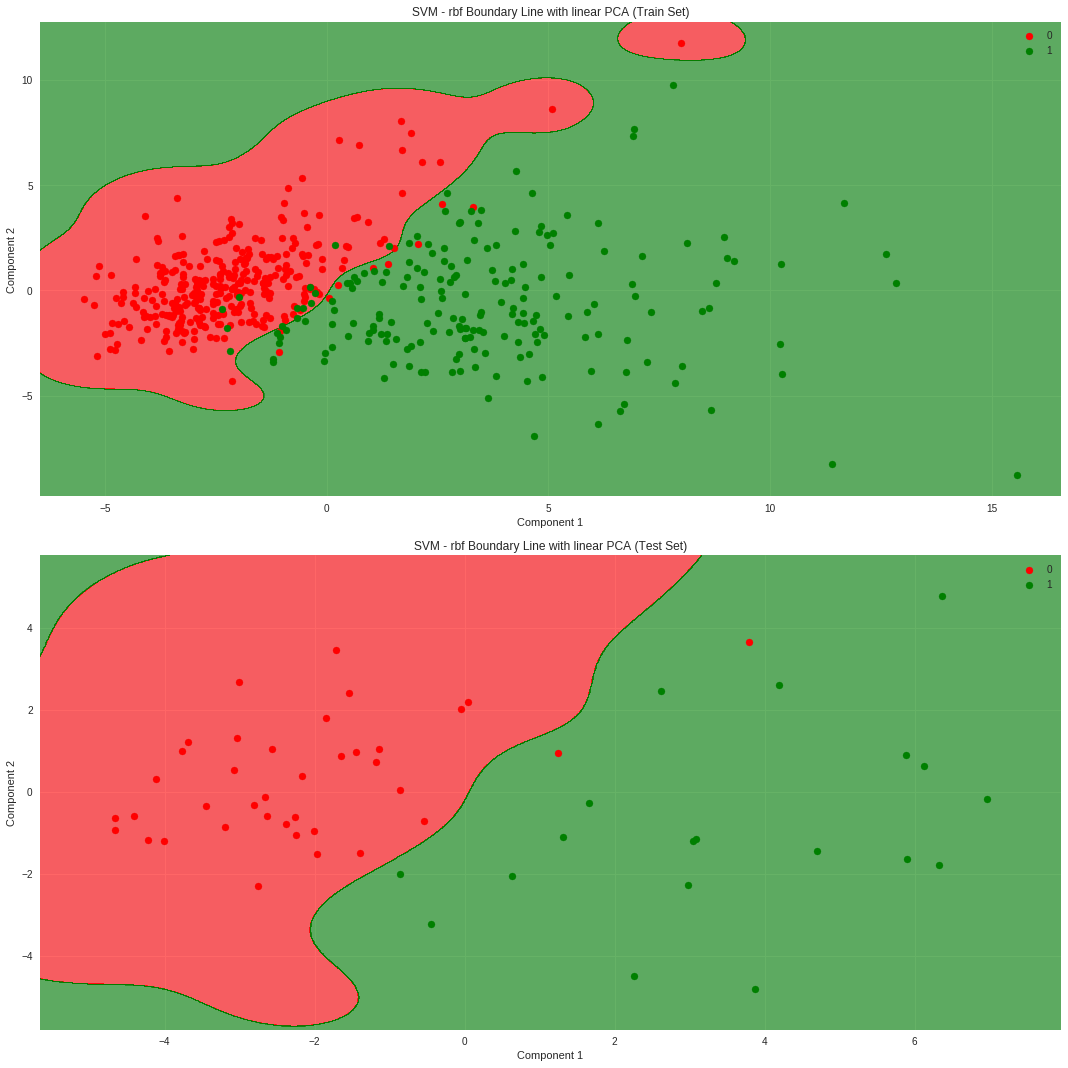

In [39]:
#Support Vector - RBF
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")

[[36  2]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.90      0.95      0.92        19

avg / total       0.95      0.95      0.95        57



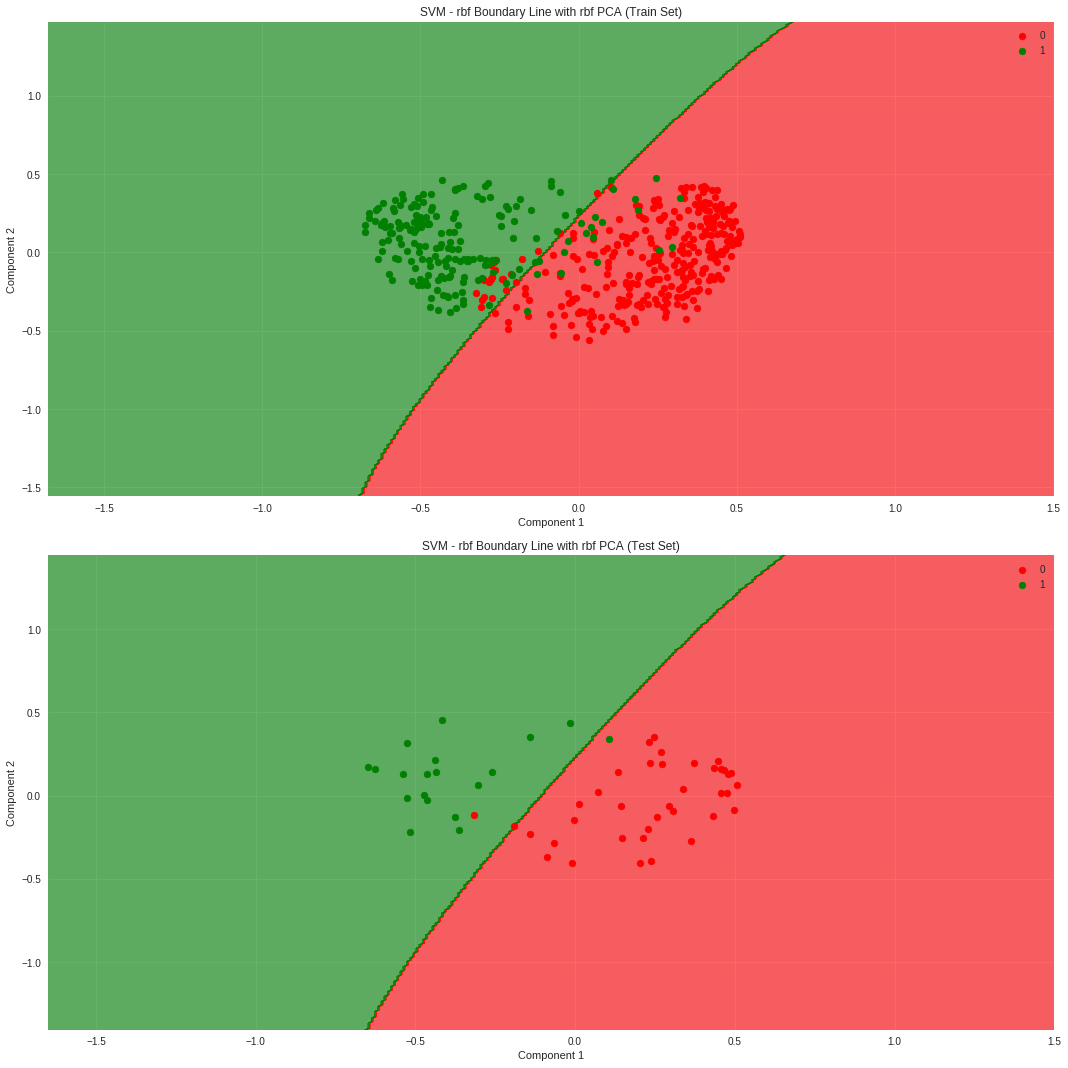

In [40]:
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")

[[38  0]
 [ 4 15]]
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        38
          1       1.00      0.79      0.88        19

avg / total       0.94      0.93      0.93        57



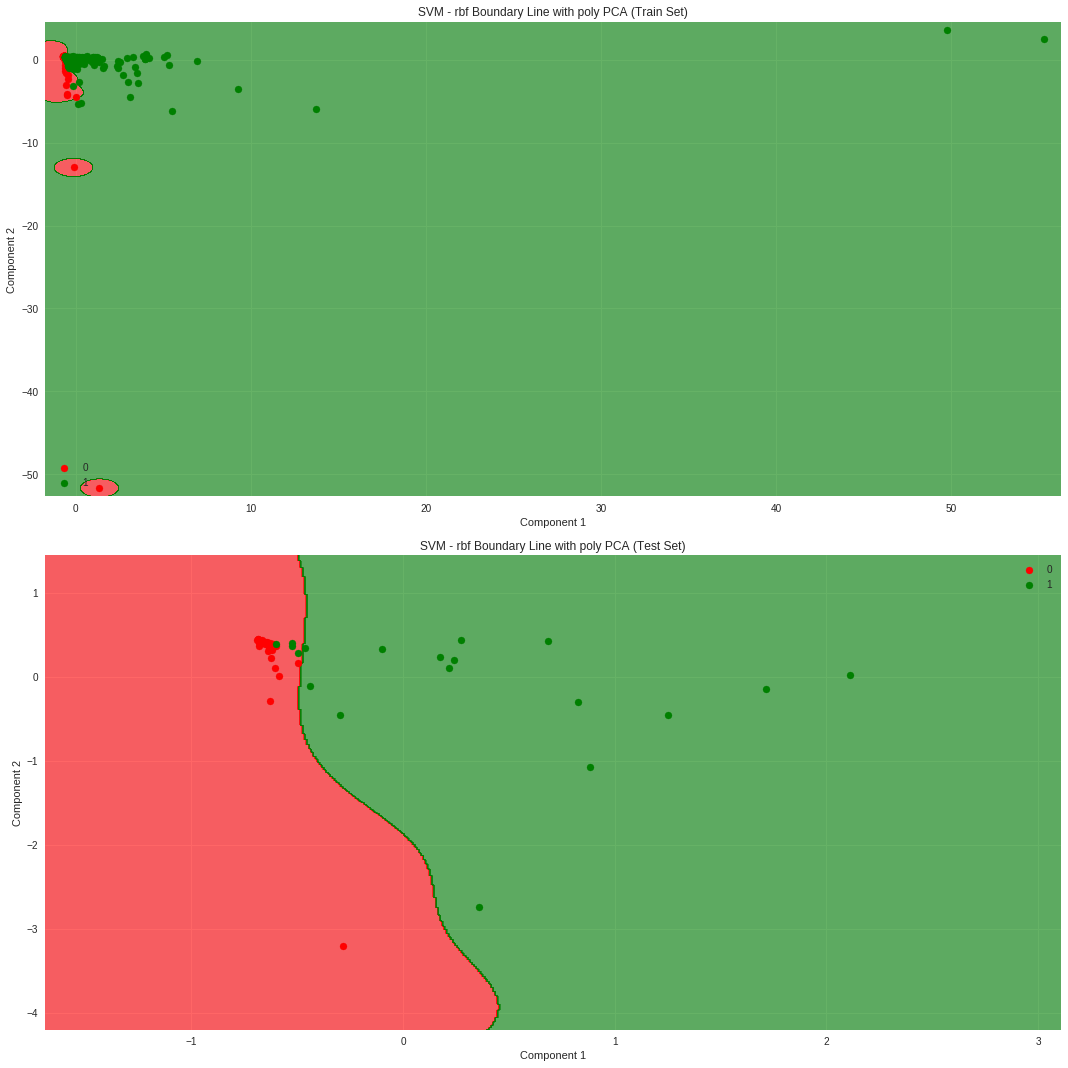

In [41]:
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



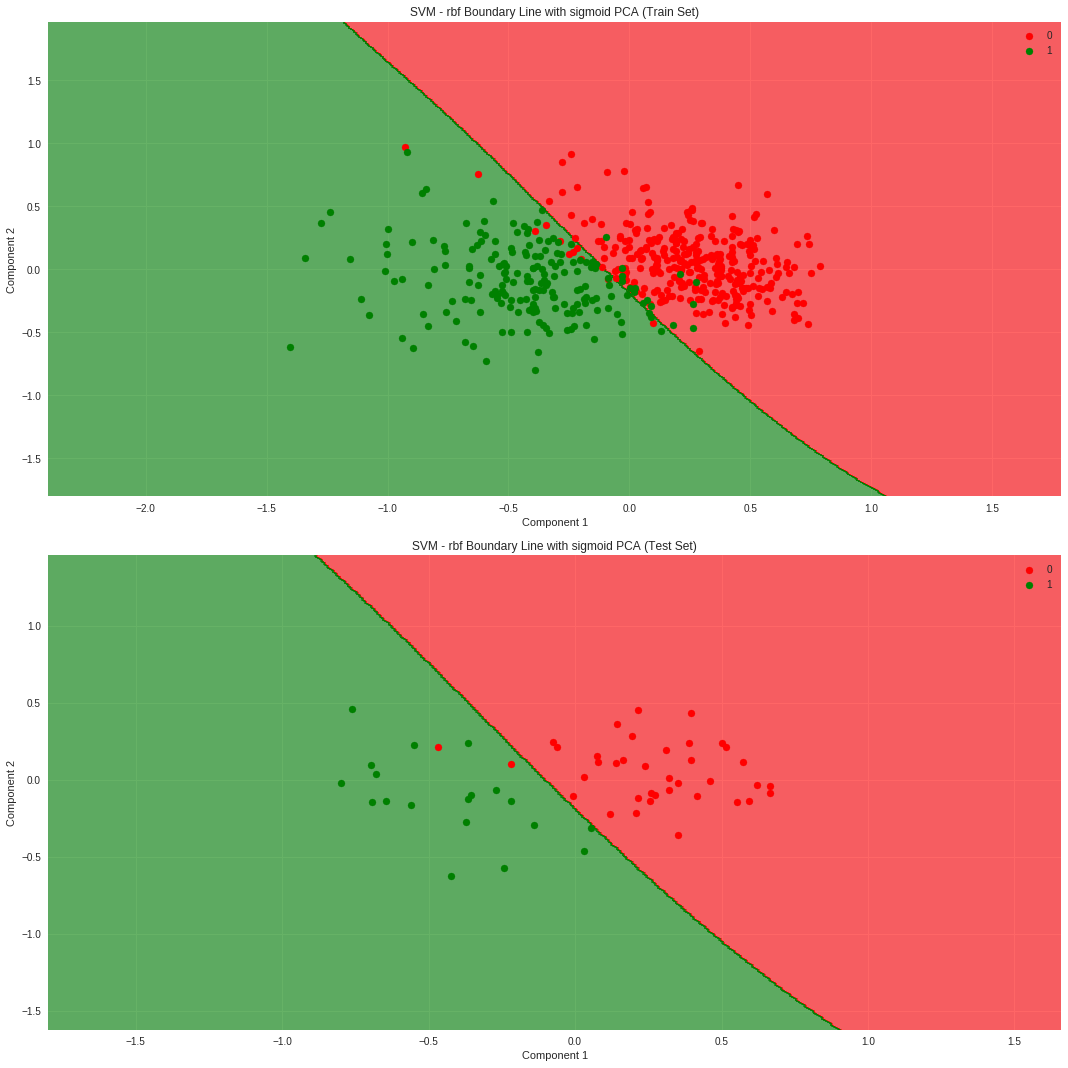

In [42]:
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")

[[36  2]
 [ 0 19]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        38
          1       0.90      1.00      0.95        19

avg / total       0.97      0.96      0.97        57



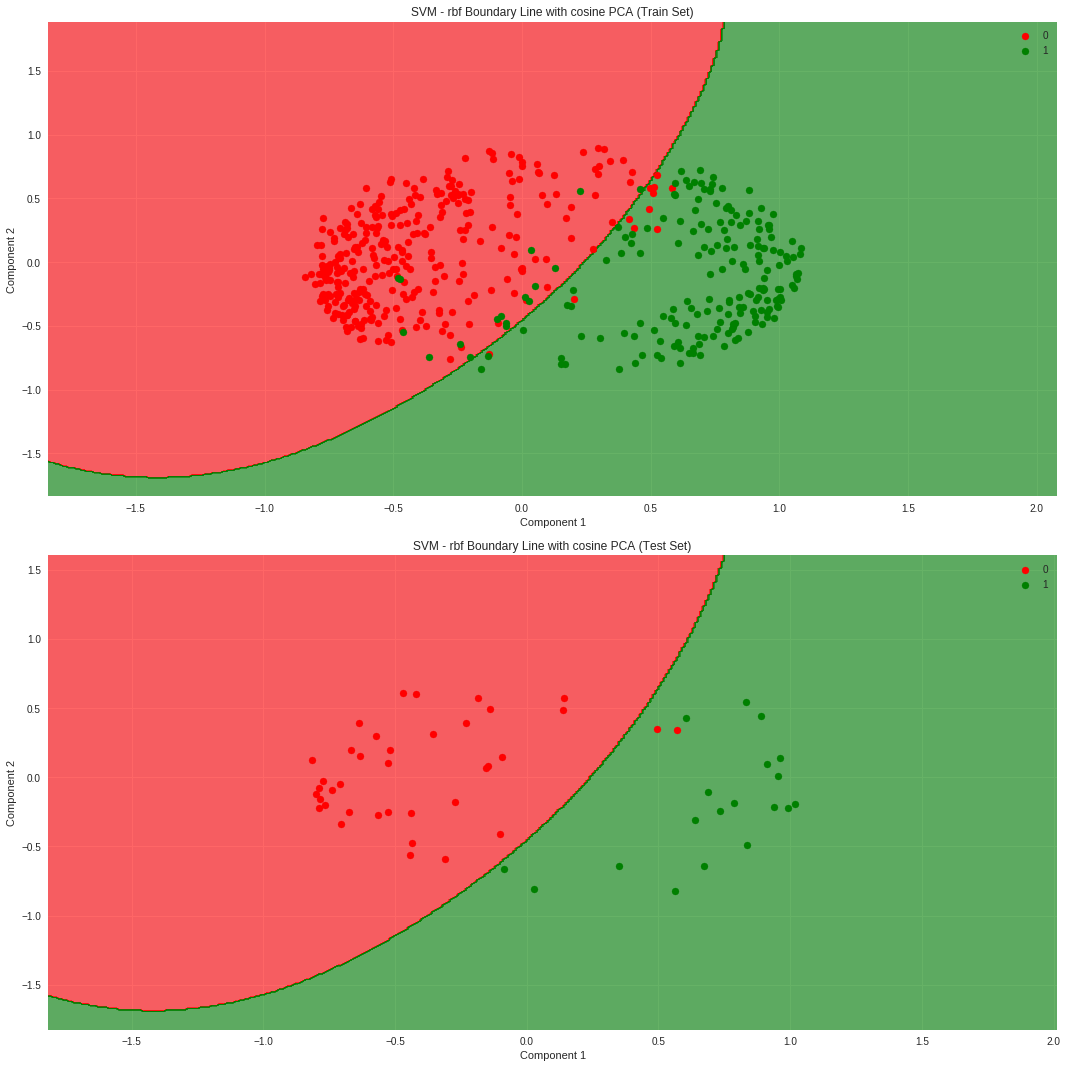

In [43]:
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")

[[37  1]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        38
          1       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        57



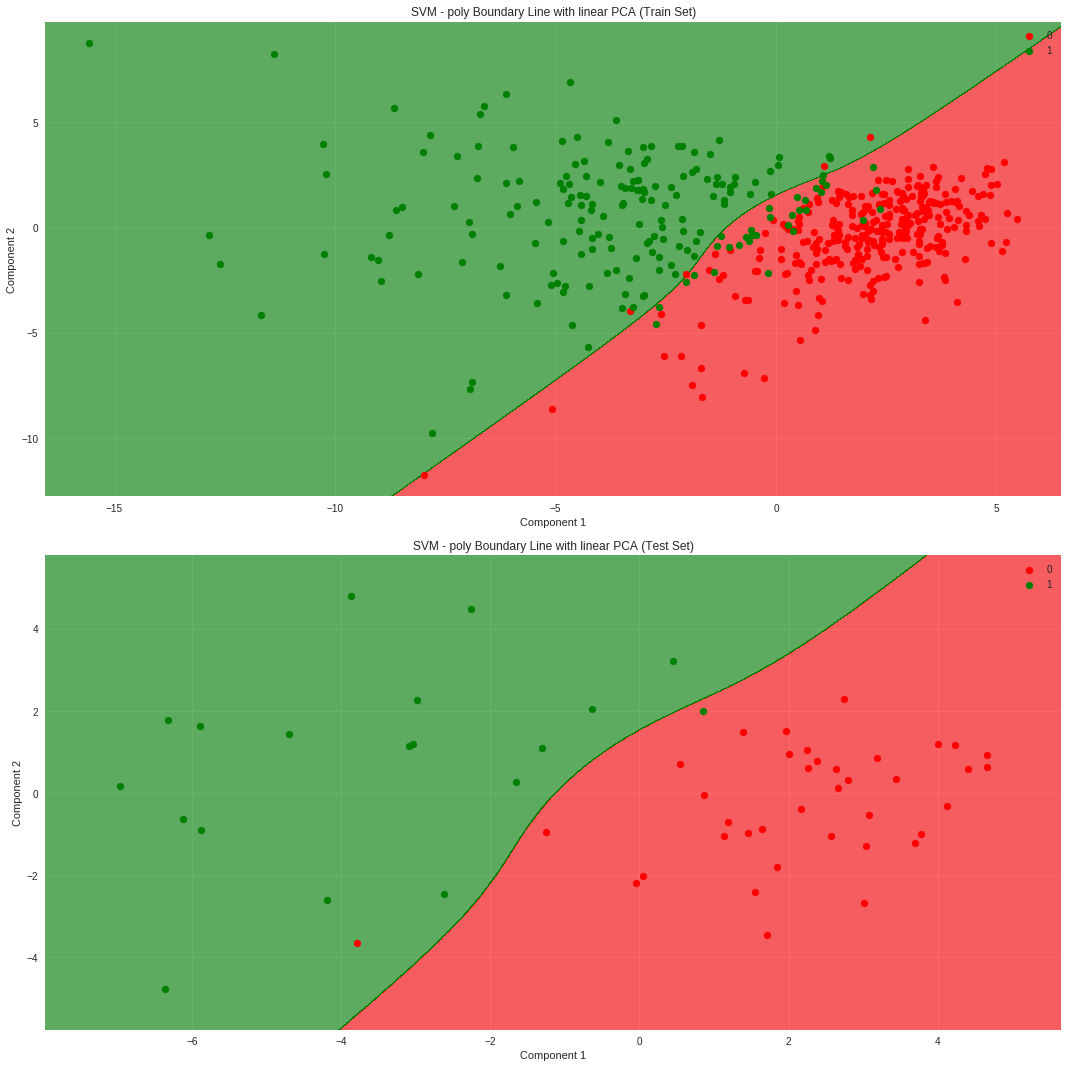

In [44]:
#Support Vector - Poly
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")

[[38  0]
 [19  0]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.67      1.00      0.80        38
          1       0.00      0.00      0.00        19

avg / total       0.44      0.67      0.53        57



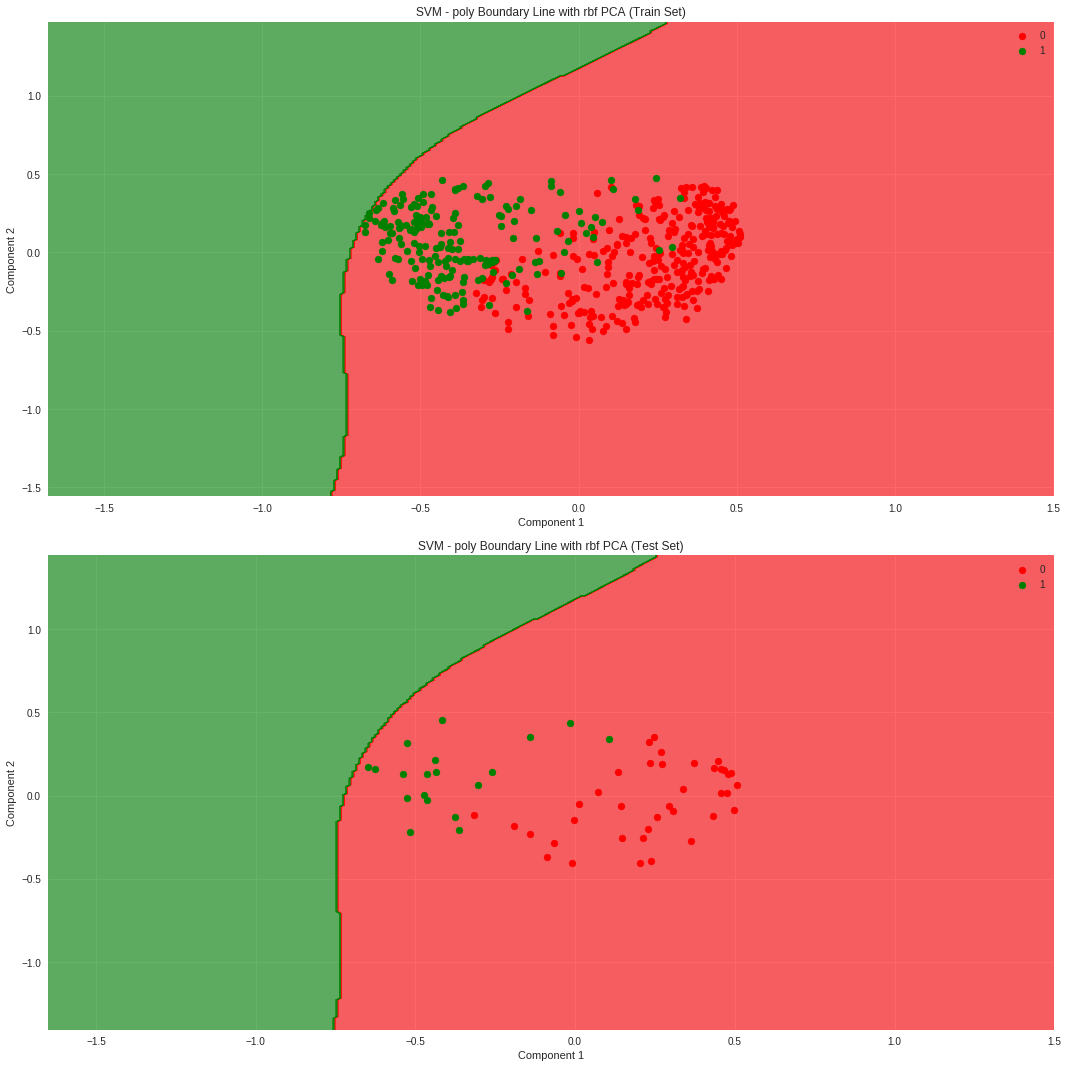

In [45]:
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")

[[38  0]
 [ 5 14]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94        38
          1       1.00      0.74      0.85        19

avg / total       0.92      0.91      0.91        57



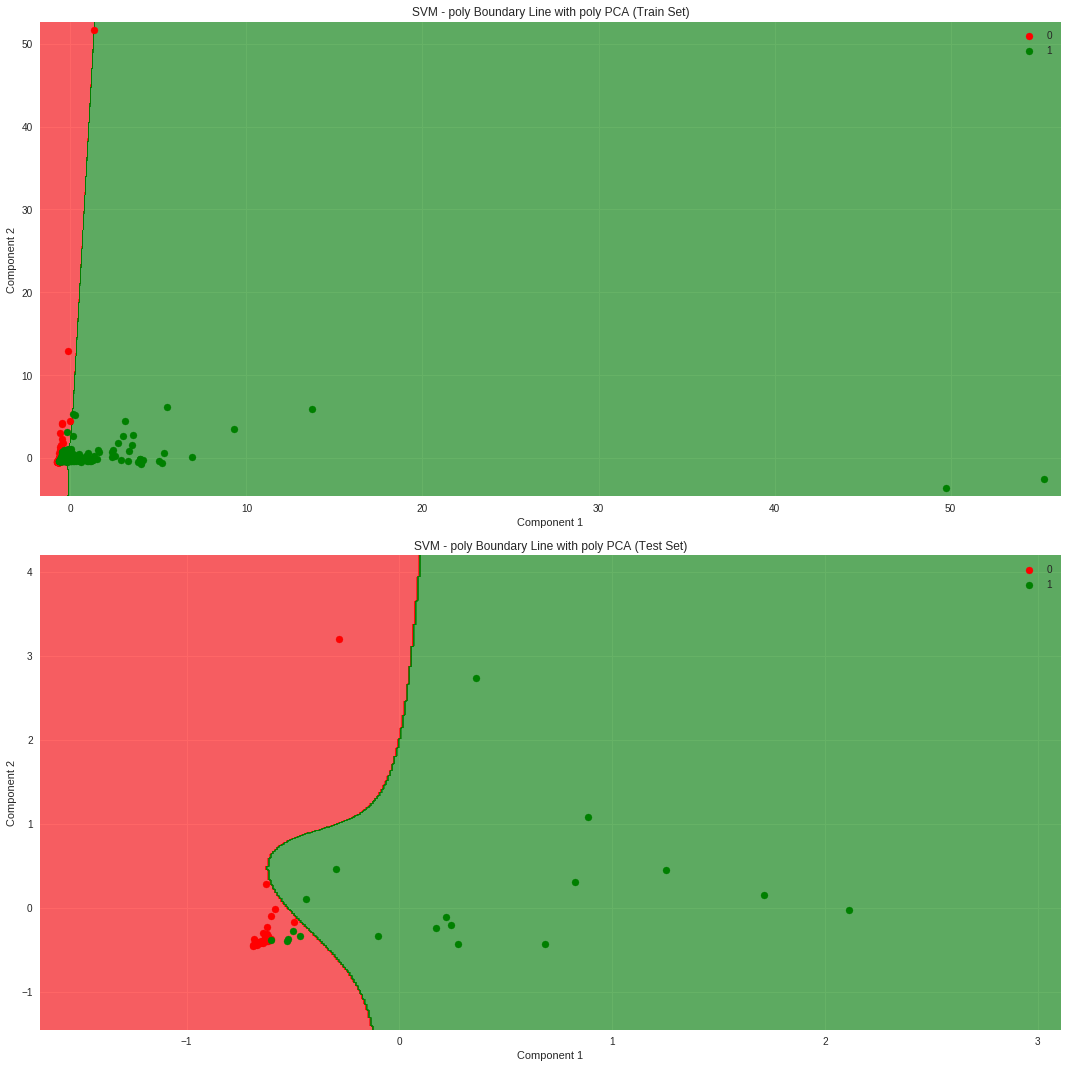

In [46]:
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")

[[38  0]
 [17  2]]
             precision    recall  f1-score   support

          0       0.69      1.00      0.82        38
          1       1.00      0.11      0.19        19

avg / total       0.79      0.70      0.61        57



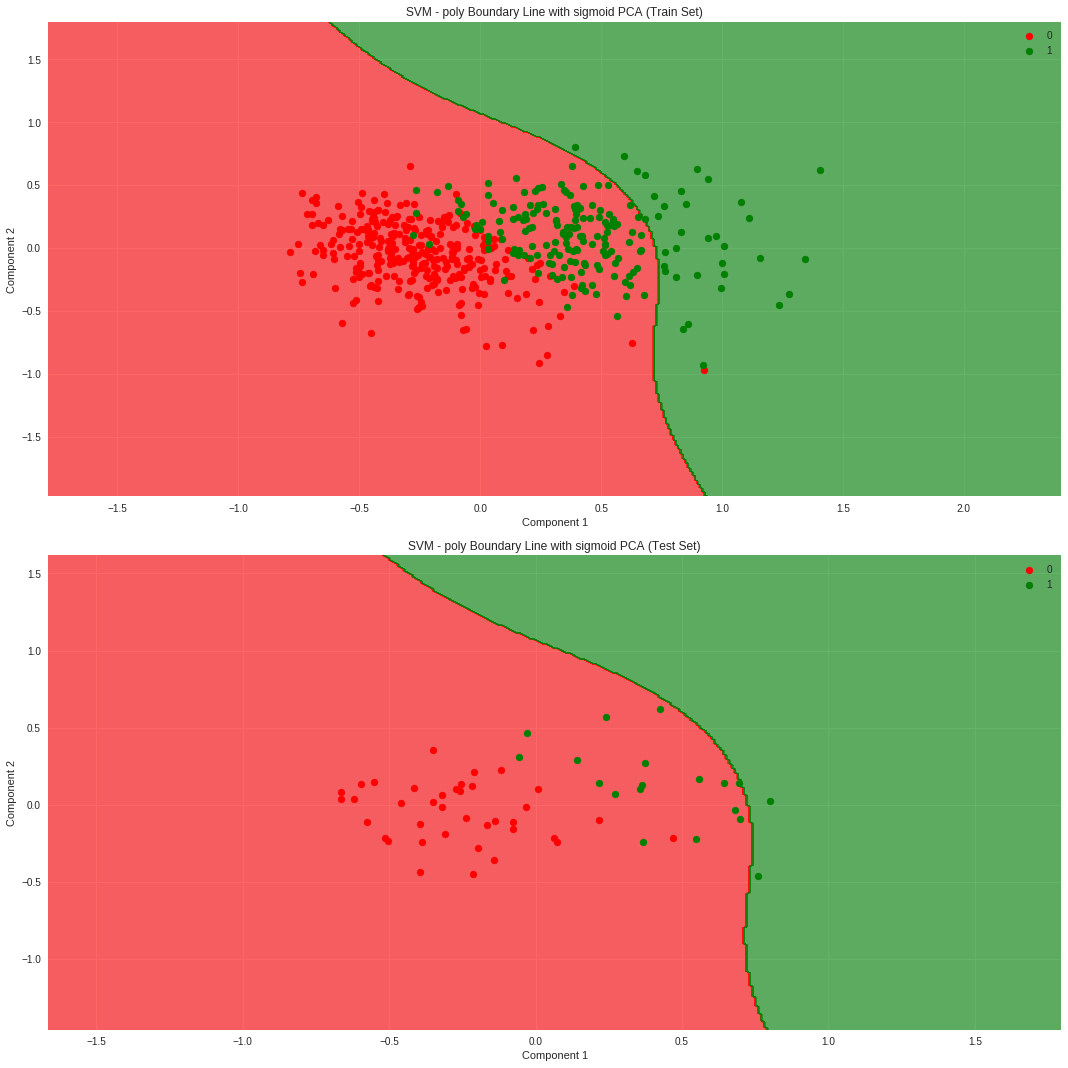

In [47]:
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")

[[38  0]
 [ 1 18]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.99        38
          1       1.00      0.95      0.97        19

avg / total       0.98      0.98      0.98        57



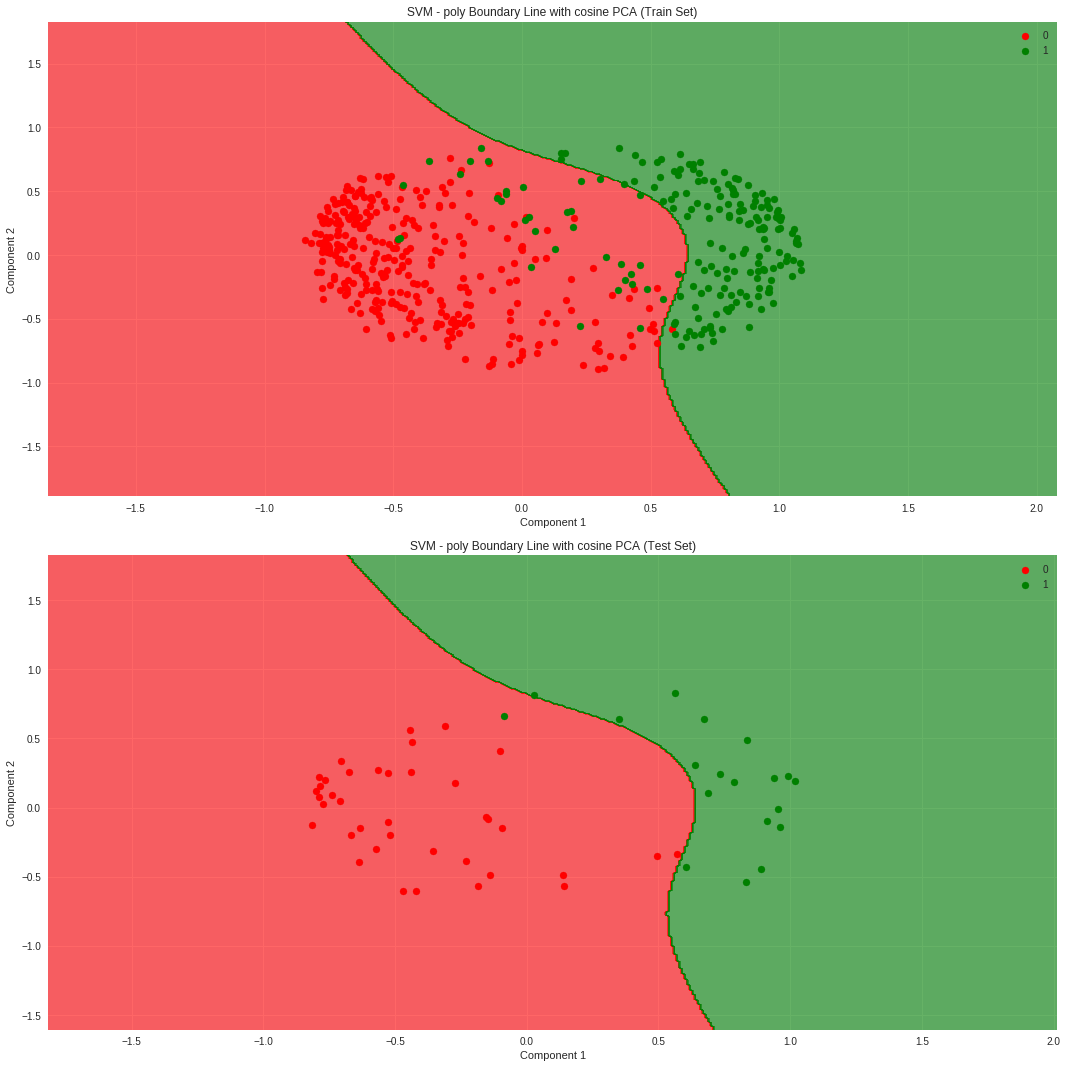

In [48]:
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")